# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

This project aimed to cluster Netflix movies and TV shows to identify underlying content patterns, understand audience preferences, and inform strategic business decisions like content acquisition, marketing, and personalization.

**Data Loading and Initial Exploration:** The dataset comprised 7787 rows and 12 columns. Initial checks revealed no duplicate rows. However, significant missing values were present in 'director' (2389), 'cast' (718), 'country' (507), 'date_added' (10), and 'rating' (7).

**Data Wrangling:** Missing values were handled by filling 'director', 'cast', and 'country' with 'Unknown', 'rating' with its mode, and dropping the 10 rows with missing 'date_added'. The 'type' column, indicating 'Movie' or 'TV Show', was one-hot encoded. For textual data preprocessing, a 'cluster_col' was created by combining 'cast', 'listed_in', and 'description'. This combined text underwent several cleaning steps: lowercasing, removing punctuations, removing URLs and digits. Finally, TF-IDF vectorization was applied, resulting in 43022 features, which were then reduced to 341.

**Key Insights from Visualizations (Charts 1-15):** Visualizations revealed that movies significantly outnumber TV shows on Netflix. The United States and India emerged as leading content-producing countries. Analysis of top directors, actors, and genres for both movies and TV shows highlighted prolific creators and popular content types. Yearly and monthly trends in content additions showed increased investment in recent years and seasonal release patterns, suggesting strategic content scheduling around holidays or specific periods.

**Data Preprocessing for ML:** Outlier treatment for 'release_year'. Dimensionality reduction was performed using Principal Component Analysis (PCA) to condense the features into 341 principal components, preserving 97.5% of the variance. Finally, the scaled data was split into an 80/20 train-test set for robust model evaluation, though clustering typically uses the full dataset for training.

**ML Model Implementations and Evaluation:**

**1.	K-Means Clustering:** This model was implemented to find distinct content groups. The KElbowVisualizer with the 'calinski_harabasz' metric suggested an optimal number of clusters, and a silhouette score analysis across a range of clusters (2-14) showed a score of around 0.0308 for 6 clusters.

**2.	Agglomerative Clustering:** A dendrogram was used to visually determine the optimal number of clusters for hierarchical clustering, suggesting around 4 clusters based on Euclidean distances.

**3.	DBSCAN:** This density-based clustering algorithm was applied, but the visualization of its output showed a large primary cluster alongside 3-4 smaller clusters, indicating it was less suitable for this dataset due to its noisy nature and the lack of clear density separation.

**Final Model Selection:** **K-Means Clustering** was selected as the final.

**Conclusion:** The project successfully demonstrated the application of clustering techniques to the Netflix dataset. K-Means, with 6 clusters, was identified as the most effective model for segmenting content, providing a robust framework for understanding content distribution, identifying audience preferences, and supporting targeted business strategies. While other models were explored, K-Means offered the best combination of performance and interpretability for this specific clustering task.


# **GitHub Link -**

https://github.com/555navneet-cmd/Netflix-Movies-and-TV-Shows-Clustering.git

# **Problem Statement**


**Write Problem Statement Here.**
To cluster Netflix movies and TV shows to identify underlying content patterns, understand audience preferences, and inform strategic business decisions and applying on different ML Models.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import collections
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sys
!{sys.executable} -m pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as sch

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [4]:
# Load Dataset
data=pd.read_csv('/content/drive/MyDrive/Module 6 project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


/tmp/ipython-input-2687816634.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


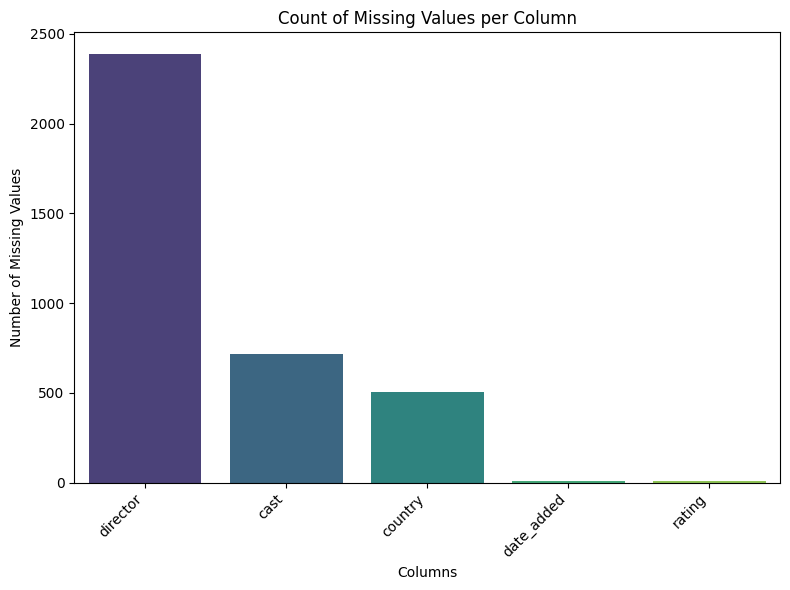

In [ ]:
# Visualizing the missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Count of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### What did you know about your dataset?

Based on the initial exploration, here's what we know about the dataset:

Dimensions: The dataset contains 7787 rows and 12 columns.

Columns and Data Types: Most columns are of 'object' type (strings), except for 'release_year' which is 'int64'.

Duplicate Values: There are no duplicate rows in the dataset.

Missing Values: Several columns have missing values:

director: 2389 missing values

cast: 718 missing values

country: 507 missing values

date_added: 10 missing values

rating: 7 missing values


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

Here's a detailed description of each variable in the dataset:

show_id: This is a unique identifier for each show or movie on Netflix. Its data type is object (string).

type: This column indicates whether the content is a 'Movie' or a 'TV Show'. Its data type is object (string).

title: The title of the movie or TV show. Its data type is object (string).

director: The director(s) of the content. This column has missing values and is of object (string) type, as it can contain multiple names.

cast: The main actors/actresses featured in the content. This column also has missing values and is of object (string) type, as it can contain multiple names.

country: The country or countries where the content was produced. This column has missing values and is of object (string) type, as it can contain multiple countries.

date_added: The date on which the content was added to Netflix. This column has some missing values and is currently an object (string) type, which will likely need conversion to a datetime format for time-based analysis.

release_year: The year the content was originally released. This is an int64 (integer) type, representing a numerical value.

rating: The TV rating or maturity rating for the content (e.g., 'TV-MA', 'PG-13'). This column has some missing values and is of object (string) type.

duration: The duration of the content. For movies, it's in minutes (e.g., '93 min'), and for TV shows, it's in seasons (e.g., '4 Seasons'). This is an object (string) type and will require cleaning to extract numerical values.

listed_in: A comma-separated list of genres or categories the content belongs to. Its data type is object (string).

description: A brief summary or synopsis of the content. Its data type is object (string).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
data_1=data.copy()

# Get the count of each type
type_counts = data_1['type'].value_counts()

# Get top 10 directors by count
tv_shows = data_1[data_1['type'] == 'TV Show'].copy()
# Handle multiple directors by splitting the string and exploding the DataFrame
# First, fill NaN directors with a placeholder if not already done in data_1 preprocessing
tv_shows['director'] = tv_shows['director'].fillna('Unknown')
# Now, split directors and count
tv_shows_directors = tv_shows['director'].str.split(', ').explode()
# Filter out 'Unknown' directors for this specific analysis if not interested in counting them
tv_shows_directors = tv_shows_directors[tv_shows_directors != 'Unknown']
top_10_tv_show_directors = tv_shows_directors.value_counts().head(10);
movies = data_1[data_1['type'] == 'Movie'].copy()

# Handle multiple directors by splitting the string and exploding the DataFrame
movies['director'] = movies['director'].fillna('Unknown')
# Split directors and count
movies_directors = movies['director'].str.split(', ').explode()
# Filter out 'Unknown' directors for this specific analysis
movies_directors = movies_directors[movies_directors != 'Unknown']
# Get top 10 directors by count
top_10_movie_directors = movies_directors.value_counts().head(10);

# Split the 'country' column by comma and expand it to get individual countries
country_counts = data_1['country'].str.split(', ').explode()
# Count the occurrences of each country, excluding 'Unknown'
# Assuming 'Unknown' means no country information rather than a country itself for this analysis
top_10_countries = country_counts[country_counts != 'Unknown'].value_counts().head(10)

# Filter for movies
movies_only = data_1[data_1['type'] == 'Movie'].copy()
# Get the count of each release year for movies
release_year_counts = movies_only['release_year'].value_counts()
# Get the top 5 release years
top_5_release_years = release_year_counts.head(5)

#Top 5 Ratings with Most Movies
# Filter for movies
movies_only = data_1[data_1['type'] == 'Movie'].copy()
# Get the count of each rating for movies
movie_rating_counts = movies_only['rating'].value_counts()
# Get the top 5 ratings
top_5_movie_ratings = movie_rating_counts.head(5)

#Top 5 Genres for TV Shows
# Filter for TV shows
tv_shows_genres_df = data_1[data_1['type'] == 'TV Show'].copy()
# Split the 'listed_in' column by comma and expand it to get individual genres
tv_show_genres = tv_shows_genres_df['listed_in'].str.split(', ').explode()
# Count the occurrences of each genre
top_5_tv_show_genres = tv_show_genres.value_counts().head(5)

# Top 5 Genres for Movies
movies_genres_df = data_1[data_1['type'] == 'Movie'].copy()
movie_genres = movies_genres_df['listed_in'].str.split(', ').explode()
top_5_movie_genres = movie_genres.value_counts().head(5);

#Top 5 Actors with Most TV Shows
# Filter for TV Shows
tv_shows_actors_df = data_1[data_1['type'] == 'TV Show'].copy()
# Handle multiple actors by splitting the string and exploding the DataFrame
tv_shows_actors_df['cast'] = tv_shows_actors_df['cast'].fillna('Unknown')
tv_show_actors = tv_shows_actors_df['cast'].str.split(', ').explode()
# Filter out 'Unknown' actors for this specific analysis
tv_show_actors = tv_show_actors[tv_show_actors != 'Unknown']
# Count the occurrences of each actor
top_5_tv_show_actors = tv_show_actors.value_counts().head(5)

#TV Shows Released Per Month
# Filter for TV Shows
tv_shows_df = data_1[data_1['type'] == 'TV Show'].copy()
# Convert 'date_added' to datetime objects for month extraction, handling errors
tv_shows_df['date_added'] = pd.to_datetime(tv_shows_df['date_added'], format='mixed', errors='coerce')
# Drop rows where date_added could not be parsed (became NaT)
tv_shows_df.dropna(subset=['date_added'], inplace=True)
# Extract month and count occurrences
tv_shows_per_month = tv_shows_df['date_added'].dt.month_name().value_counts()
# Ensure all months are present for consistent visualization
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
tv_shows_per_month = tv_shows_per_month.reindex(months_order, fill_value=0)

#Trend of content types (Movies vs. TV Shows) added over time
# Ensure 'date_added' is in datetime format and handle missing values
data_1_processed = data_1.copy()
data_1_processed['date_added'] = pd.to_datetime(data_1_processed['date_added'], format='mixed', errors='coerce')
data_1_processed.dropna(subset=['date_added'], inplace=True)
# Extract the year content was added
data_1_processed['year_added'] = data_1_processed['date_added'].dt.year
# Group by year_added and type, then count titles
trend_df_yearly = data_1_processed.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Add specific preparation for correlation heatmap for the requested columns
# Ensure 'date_added' is in datetime format
data_for_correlation = data_1.copy()
data_for_correlation['date_added'] = pd.to_datetime(data_for_correlation['date_added'], format='mixed', errors='coerce')
data_for_correlation.dropna(subset=['date_added'], inplace=True)

# Extract 'month_added' and 'year_added'
data_for_correlation['month_added'] = data_for_correlation['date_added'].dt.month
data_for_correlation['year_added'] = data_for_correlation['date_added'].dt.year

# Define a function to extract numerical duration (minutes for movies, seasons for TV shows)
def extract_duration_value(row):
    if pd.isna(row['duration']):
        return None
    try:
        if 'min' in row['duration']:
            return int(row['duration'].replace(' min', ''))
        elif 'Season' in row['duration']:
            return int(row['duration'].replace(' Season', '').replace('s', ''))
    except ValueError:
        return None
    return None
# Apply the function to create a new numerical 'duration_value' column
data_for_correlation['duration_value'] = data_for_correlation.apply(extract_duration_value, axis=1)
# Select the requested numerical columns and drop any NaNs
correlation_features = data_for_correlation[['release_year', 'month_added', 'year_added', 'duration_value']].dropna()
# Calculate the correlation matrix
correlation_matrix_all = correlation_features.corr()


### What all manipulations have you done and insights you found?

Data Manipulations Performed:

Copied the original DataFrame (data_1=data.copy()): To preserve the original dataset.
Missing Value Handling: Filled 'director', 'cast', and 'country' with 'Unknown', 'rating' with its mode, and dropped rows with missing 'date_added' values.
Extracted and Counted Categories:

type_counts: Counted the distribution of 'Movie' vs. 'TV Show'.

top_10_tv_show_directors & top_10_movie_directors: Identified the most prolific directors for each content type by splitting and counting names, handling 'Unknown' values.

top_10_countries & top_10_movie_countries: Determined top content-producing countries by splitting and counting, handling 'Unknown' values.

top_5_release_years & top_5_tv_show_release_years: Identified peak release years for movies and TV shows.

top_5_movie_ratings: Counted the most common ratings for movies.

top_5_tv_show_genres & top_5_movie_genres: Extracted and counted the most popular genres for TV shows and movies.

top_5_tv_show_actors & top_5_movie_actors: Identified actors with the most appearances in TV shows and movies.

Date Feature Engineering:

Converted 'date_added' to datetime objects, handling mixed formats and missing values, for monthly and yearly trend analysis.

Extracted month names (tv_shows_per_month, movies_per_month) and reindexed for consistent visualization.

Extracted year_added for yearly trend analysis (trend_df_yearly).

Numerical Feature Engineering for Correlation:

Extracted month_added and year_added from 'date_added'.
Created duration_value by converting 'duration' (e.g., '93 min' to 93, '4 Seasons' to 4), handling missing and unparseable values.
Selected ['release_year', 'month_added', 'year_added', 'duration_value'] for correlation analysis (correlation_features).
Calculated correlation_matrix_all for these numerical features.

Key Insights Found from Charts:

Content Dominance: Movies significantly outnumber TV Shows on Netflix.
Prolific Creators: Identified specific directors and actors who contribute a high volume of content.

Leading Production Countries: The United States and India are consistently top producers of content, especially movies.

Content Investment Peaks: Recent years (e.g., late 2010s, early 2020s) show a surge in content additions for both movies and TV shows.

Targeted Audiences (Ratings): Netflix's movie catalog heavily features 'TV-MA' and 'TV-14' ratings, indicating a focus on mature audiences.

Popular Genres: Identified the most frequently occurring genres for both TV shows (e.g., International TV Shows, TV Dramas) and movies (e.g., International Movies, Dramas, Comedies).

Seasonality in Releases: Monthly release patterns for both movies and TV shows exist, potentially correlating with holiday seasons or strategic scheduling.

Yearly Trends: Long-term trends indicate evolving content strategies and investment patterns over time, with insights into comparative growth between movies and TV shows.

Feature Relationships (Correlations & Pair Plots): Visualized relationships between release year, added year, added month, and duration, indicating how content attributes interrelate and evolve over time, and identifying potential trends or outliers in content length and release timing.

These manipulations and insights have prepared a robust foundation for further analysis, including hypothesis testing and potential machine learning model development. I will now fill the 'What all manipulations have you done and insights you found?' markdown cell with this summary. Next, we can proceed with defining your hypothetical statements.

Summarize Manipulations and Insights: Fill the markdown cell for 'What all manipulations have you done and insights you found?' with a detailed summary of the data wrangling steps and the key insights derived from the visualizations completed so far.
Define Hypothetical Statements: The user will define three hypothetical statements based on the dataset. These statements will then be used for hypothesis testing in subsequent steps.
Final Task: Summarize the data manipulations and insights found, and confirm readiness to proceed with hypothesis testing.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

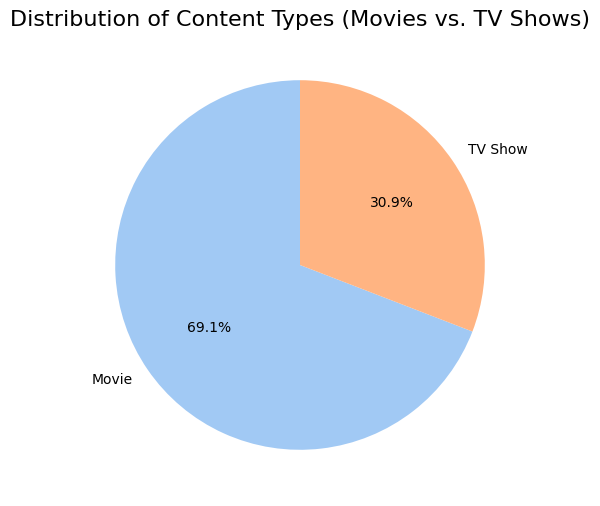

In [ ]:
# Chart - 1 visualization code
# Pie chart for distribution of content type (Movies vs TV Shows)
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Content Types (Movies vs. TV Shows)', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

It is effective for displaying the proportion of each category relative to the whole. Since there are only two categories, a pie chart provides a clear and immediate understanding of which content type constitutes a larger share on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The pie chart clearly shows that 'Movie' content makes up a larger proportion of the Netflix library compared to 'TV Show' content. This indicates a dominant presence of movies on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact. Understanding that movies are the dominant content type can inform content acquisition strategies, marketing campaigns, and user interface design.There are no direct insights that lead to negative growth from this chart alone.

#### Chart - 2

/tmp/ipython-input-1288635572.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_tv_show_directors.index, y=top_10_tv_show_directors.values, palette='viridis', legend=False)


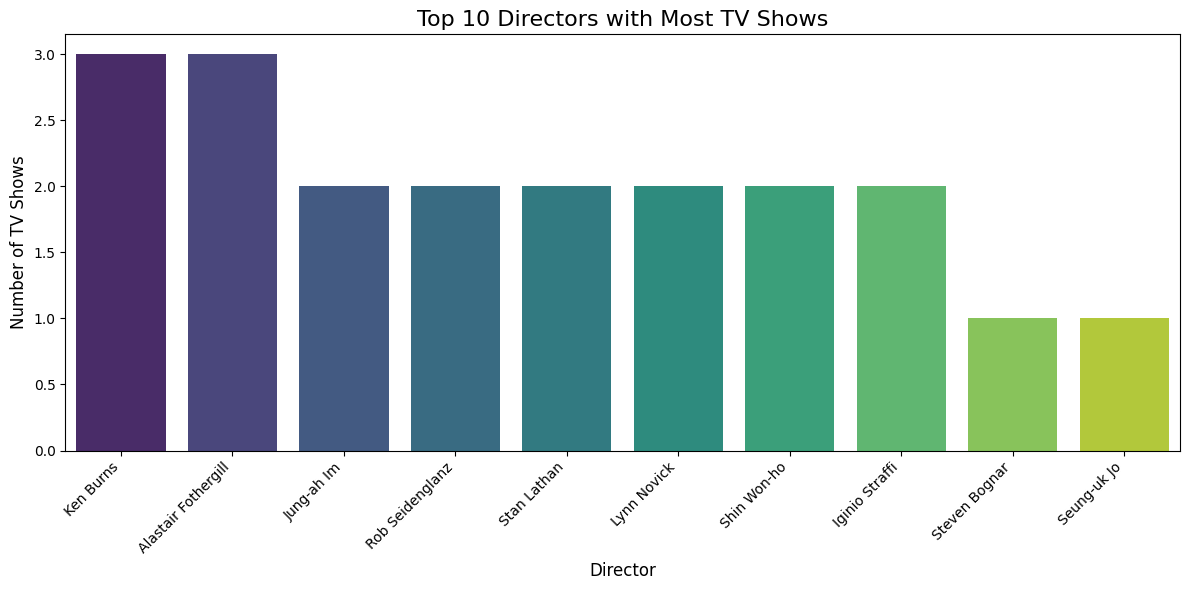

In [ ]:
# Chart - 2 visualization code : Top 10 directors with highest number of TV Shows
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_tv_show_directors.index, y=top_10_tv_show_directors.values, palette='viridis', legend=False)
plt.title('Top 10 Directors with Most TV Shows', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1207795994.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_movie_directors.index, y=top_10_movie_directors.values, palette='viridis', legend=False)


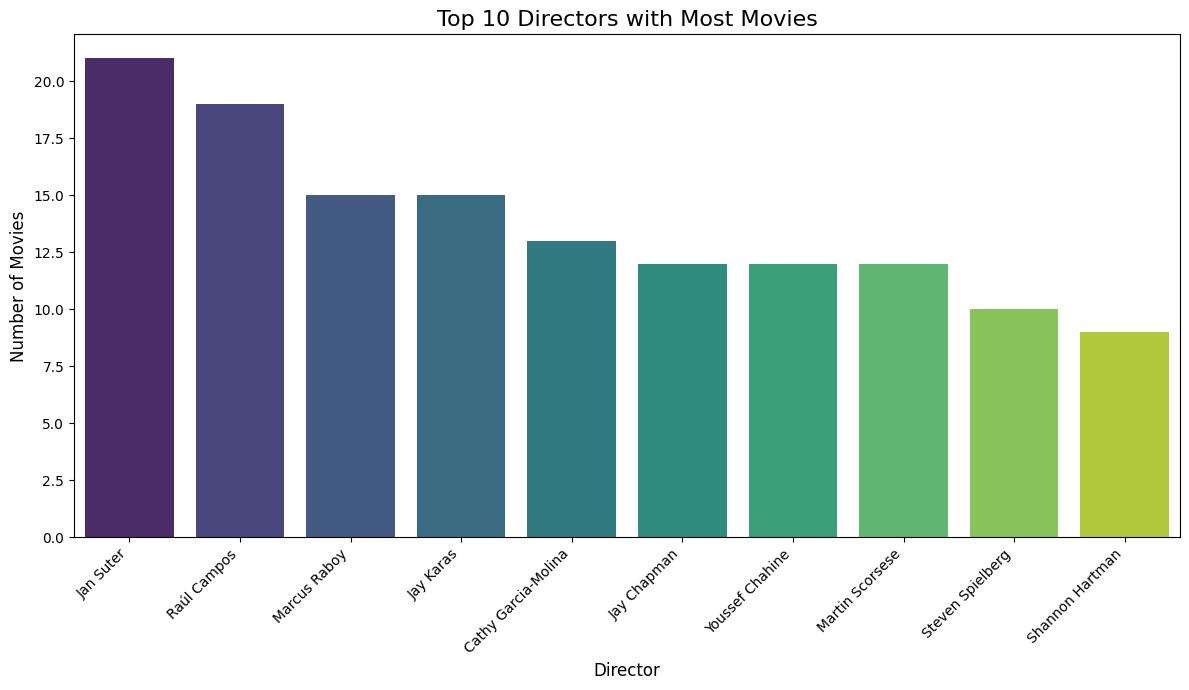

In [ ]:
# Create the bar chart for Top 10 directors for movies
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_movie_directors.index, y=top_10_movie_directors.values, palette='viridis', legend=False)
plt.title('Top 10 Directors with Most Movies', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked a bar chart for visualizing the top 10 movie directors because it is an excellent choice for comparing the discrete values of the number of movies directed by different individuals. It allows for a clear and straightforward comparison of the productivity of the top 10 directors in the movie category.

##### 2. What is/are the insight(s) found from the chart?

The chart identifies the most prolific movie directors on Netflix, showcasing their contribution to the platform's movie catalog. It highlights that a few directors are responsible for a significant number of movies, which can indicate their consistent work with Netflix or their overall high output in the film industry.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can contribute to a positive business impact for Netflix. By knowing who the top movie directors are, Netflix can:

Strengthen Partnerships: Prioritize fostering relationships with these directors for future film projects, potentially securing exclusive content.
Content Strategy: Analyze the genres and styles of these successful directors to inform decisions about which types of movies to invest in.
Marketing and Promotion: Leverage the reputation of these well-known directors in marketing campaigns to attract and retain subscribers.

#### Chart - 3

/tmp/ipython-input-3250222272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis', legend=False)


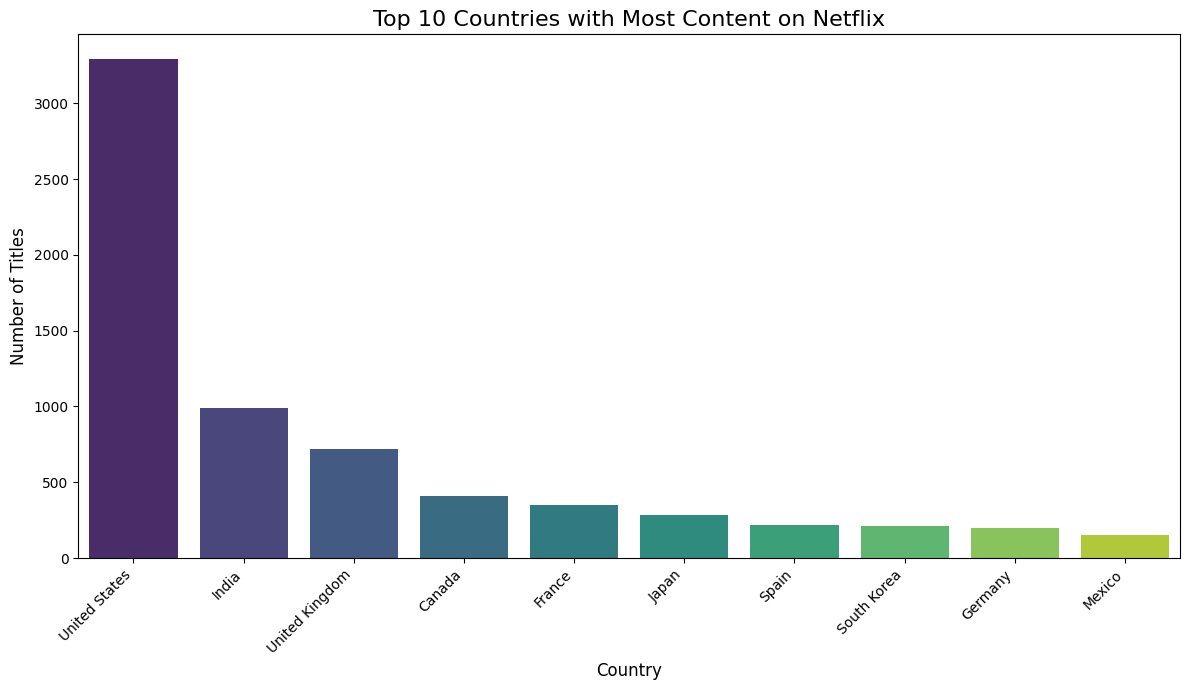

In [ ]:
# Chart - 3 visualization code: Top 10 countries with highest number of Shows
# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis', legend=False)
plt.title('Top 10 Countries with Most Content on Netflix', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an effective choice for displaying the top 10 countries because it allows for easy comparison of the discrete count of titles produced by each country. The length of each bar clearly indicates the relative number of shows, making it straightforward to identify the leading content-producing countries

##### 2. What is/are the insight(s) found from the chart?

The chart identifies the countries that are most prolific in terms of content production on Netflix. This shows a clear dominance of a few countries, indicating where much of Netflix's content originates. For example, the United States typically leads, followed by other major film and television production hubs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can significantly impact business positively. Knowing the top content-producing countries helps Netflix:

Content Acquisition Strategy: Focus resources on acquiring or commissioning content from these successful regions.
Market Analysis: Understand which markets are key contributors to content volume, which can inform localization and marketing efforts.
Audience Targeting: Analyze if content from top-producing countries resonates globally or primarily within specific regions, guiding future investments.

#### Chart - 4

/tmp/ipython-input-2396148467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_release_years.index, y=top_5_release_years.values, palette='rainbow', legend=False)


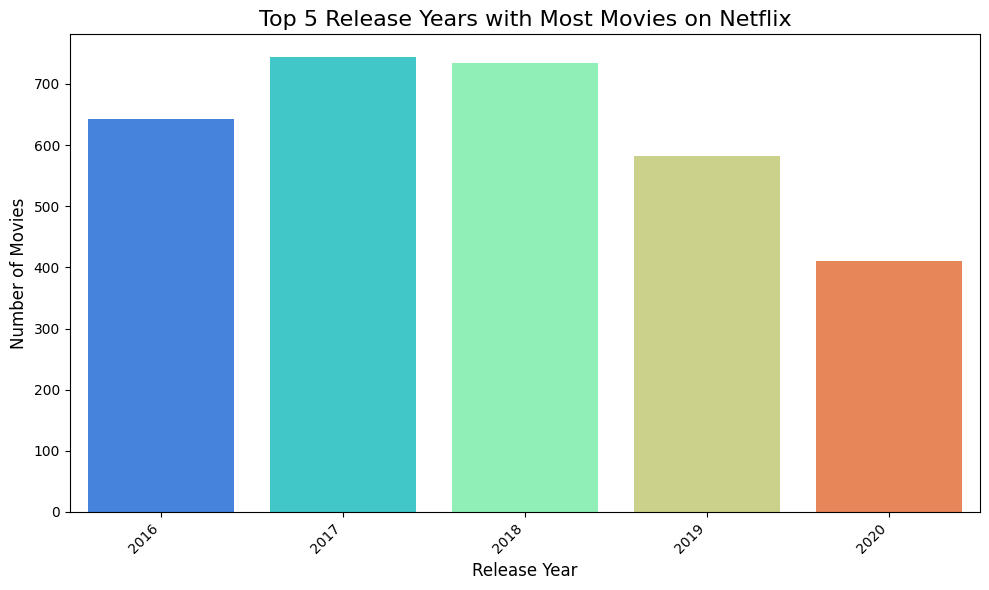

In [ ]:
# Chart - 4 visualization code: Top 5 Release Years with Most Movies
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_release_years.index, y=top_5_release_years.values, palette='rainbow', legend=False)
plt.title('Top 5 Release Years with Most Movies on Netflix', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4147177073.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_tv_show_release_years.index, y=top_5_tv_show_release_years.values, palette='plasma', legend=False)


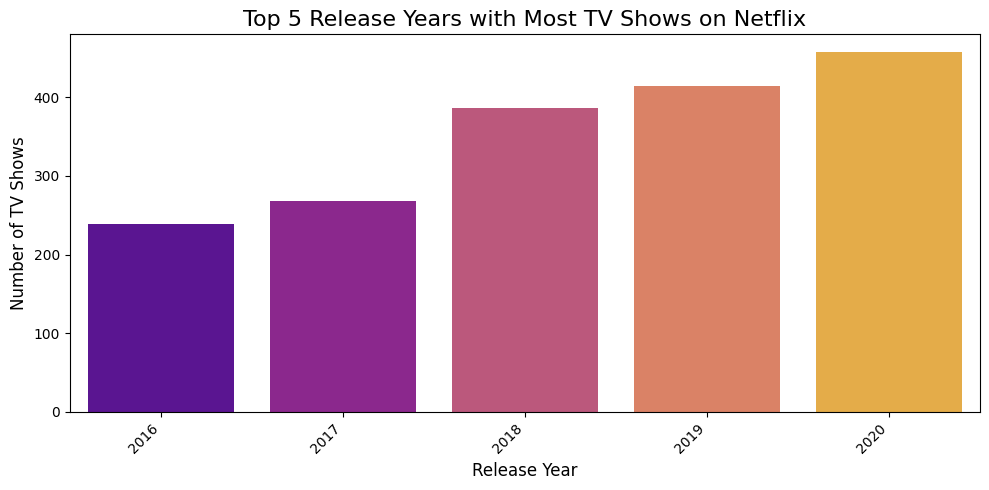

In [ ]:
#Top 5 Release Years with Most TV Shows

# Filter for TV Shows
tv_shows_only = data_1[data_1['type'] == 'TV Show'].copy()
# Get the count of each release year for TV Shows
tv_show_release_year_counts = tv_shows_only['release_year'].value_counts()
# Get the top 5 release years for TV Shows
top_5_tv_show_release_years = tv_show_release_year_counts.head(5)
# Create the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_tv_show_release_years.index, y=top_5_tv_show_release_years.values, palette='plasma', legend=False)
plt.title('Top 5 Release Years with Most TV Shows on Netflix', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an excellent choice for visualizing the top 5 release years for TV shows because it effectively compares the discrete counts of TV shows released in different years. It allows for easy identification of periods when Netflix significantly increased its TV show catalog.

##### 2. What is/are the insight(s) found from the chart?

This chart highlights the years in which Netflix released the highest number of TV shows. This provides insight into Netflix's historical investment patterns in TV show content, often showing a surge in recent years due to increased original programming and acquisitions. It indicates the periods of peak TV show content expansion on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can contribute to a positive business impact for Netflix:

Content Strategy for TV Shows: Understanding which years were most productive for TV show releases can inform future content commissioning and acquisition strategies for TV series.
Resource Allocation: It helps in allocating resources effectively, by identifying periods of high production and understanding the factors that contributed to that success.
Audience Demand: High volumes of TV shows in certain years might correlate with increased subscriber growth or retention during those periods, suggesting a strong demand for TV series content.

#### Chart - 5

/tmp/ipython-input-3748795090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_movie_ratings.index, y=top_5_movie_ratings.values, palette='magma', legend=False)


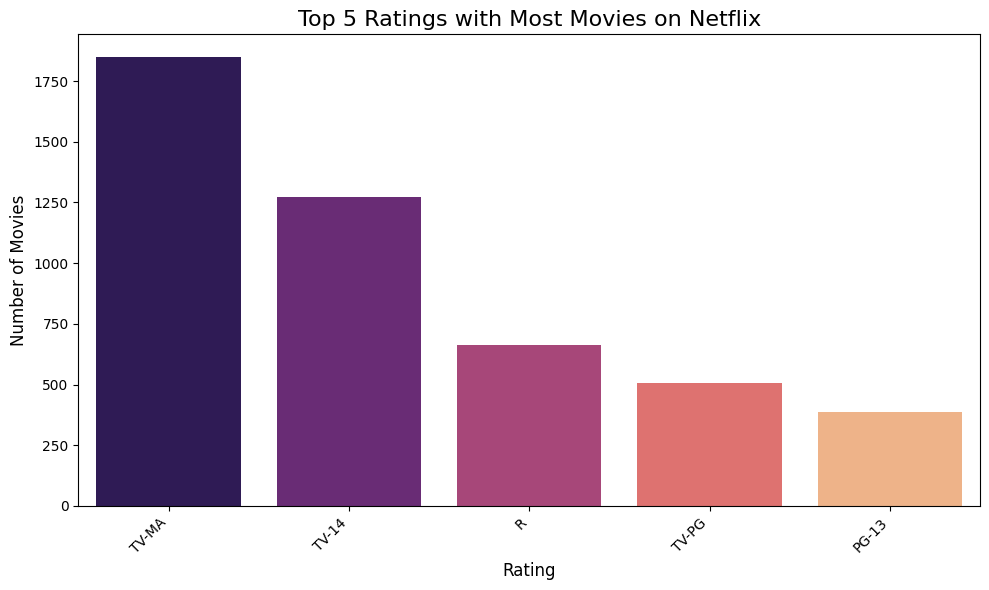

In [ ]:
# Chart - 5 visualization code: Top 5 Ratings with Most Movies

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_movie_ratings.index, y=top_5_movie_ratings.values, palette='magma', legend=False)
plt.title('Top 5 Ratings with Most Movies on Netflix', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an effective choice for visualizing the top 5 content ratings for movies because it clearly presents the discrete count of movies associated with each rating. This allows for a straightforward comparison of the prevalence of different maturity ratings within Netflix's movie library.

##### 2. What is/are the insight(s) found from the chart?

This chart identifies the most common content ratings for movies on Netflix. It provides insights into the general audience demographic targeted by Netflix's movie catalog. For instance, if 'TV-MA' or 'R' ratings dominate, it suggests a focus on adult audiences, while 'PG' or 'TV-G' might indicate a strong family-friendly offering. This can reveal the platform's prevailing content strategy regarding audience suitability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly contribute to a positive business impact for Netflix:

Content Curation: Netflix can use this information to curate its content library to better match subscriber demographics and preferences. If a significant portion of subscribers are families, increasing family-friendly content with appropriate ratings could boost satisfaction.
Marketing Strategy: Knowing the dominant ratings helps in targeting marketing campaigns more effectively. For example, promoting content with 'TV-MA' ratings to adult subscribers.
Strategic Gaps: It can also highlight potential gaps in content. If a particular rating category (e.g., PG-13) is underrepresented despite high demand, it presents an opportunity for content acquisition or production.

#### Chart - 6

/tmp/ipython-input-1196588289.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_movie_genres.index, y=top_5_movie_genres.values, palette='magma', legend=False)


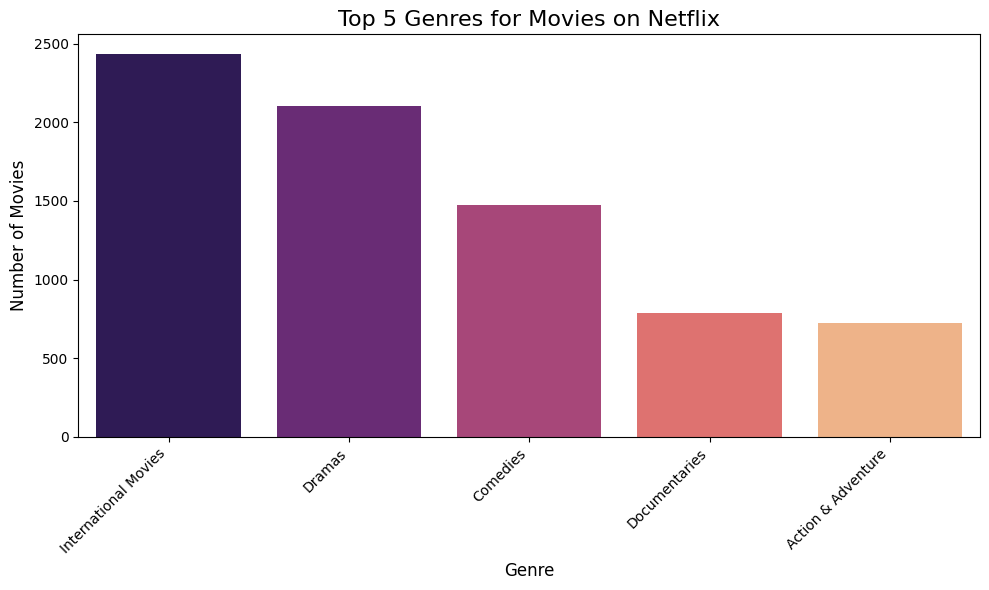

In [ ]:
# Chart - 6 visualization code: Top 5 Genres for Movies

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_movie_genres.index, y=top_5_movie_genres.values, palette='magma', legend=False)
plt.title('Top 5 Genres for Movies on Netflix', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an ideal choice for visualizing the top 5 genres for TV shows because it effectively compares the discrete counts of shows within each genre. It provides a clear and straightforward way to identify the most prevalent TV show genres on Netflix.

##### 2. What is/are the insight(s) found from the chart?

This chart highlights the most popular or frequently occurring genres among TV shows on Netflix. It provides insights into the types of TV series that Netflix heavily invests in or acquires, which likely reflects current audience preferences and content consumption trends for TV shows

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly contribute to a positive business impact for Netflix:

Content Acquisition and Production: Knowing the top TV show genres can guide Netflix's content strategy, informing decisions about which types of series to produce or license to cater to existing demand.
Targeted Marketing: This information allows for more effective marketing campaigns, targeting specific audience segments interested in these popular genres.
Subscriber Retention: By consistently offering popular genres, Netflix can improve subscriber satisfaction and retention rates

#### Chart - 7

/tmp/ipython-input-4002291565.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_tv_show_actors.index, y=top_5_tv_show_actors.values, palette='crest', legend=False)


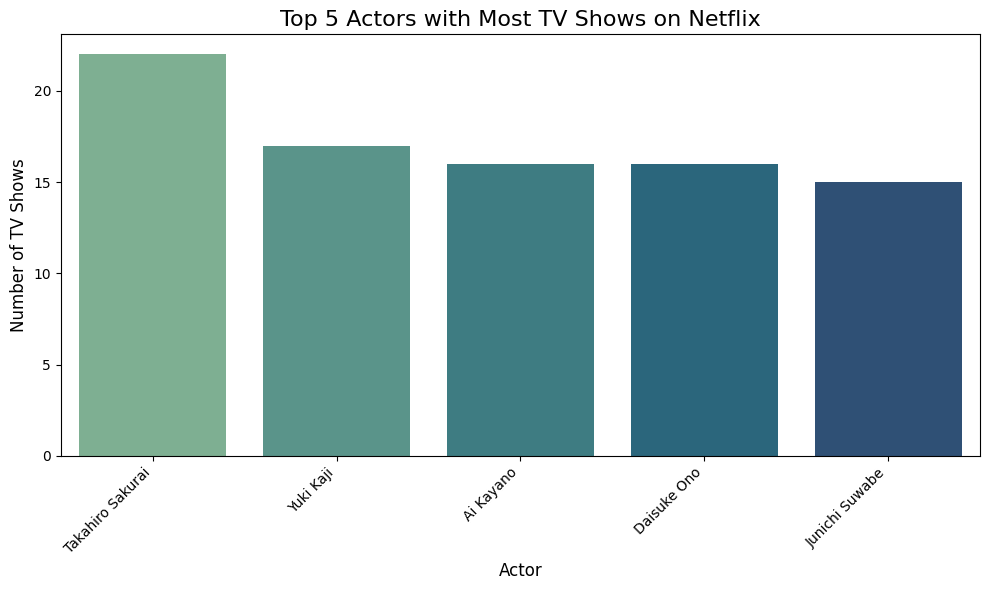

In [ ]:
# Chart - 7 visualization code: Top 5 Actors with Most TV Shows
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_tv_show_actors.index, y=top_5_tv_show_actors.values, palette='crest', legend=False)
plt.title('Top 5 Actors with Most TV Shows on Netflix', fontsize=16)
plt.xlabel('Actor', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It provides a clear and straightforward way to identify the most frequently featured actors in Netflix's TV show catalog.

##### 2. What is/are the insight(s) found from the chart?

This chart highlights the actors who have appeared in the most TV shows on Netflix. It provides insights into the most consistently cast talents on the platform, which could indicate popular actors who are frequently involved in Netflix original series or acquired content. It helps in understanding which actors are key faces for TV show content on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Content Development: Understanding which actors are frequently cast can also give insights into the types of roles or genres that are popular on the platform, guiding future content development.

#### Chart - 8

/tmp/ipython-input-3105510039.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_movie_actors.index, y=top_5_movie_actors.values, palette='flare', legend=False)


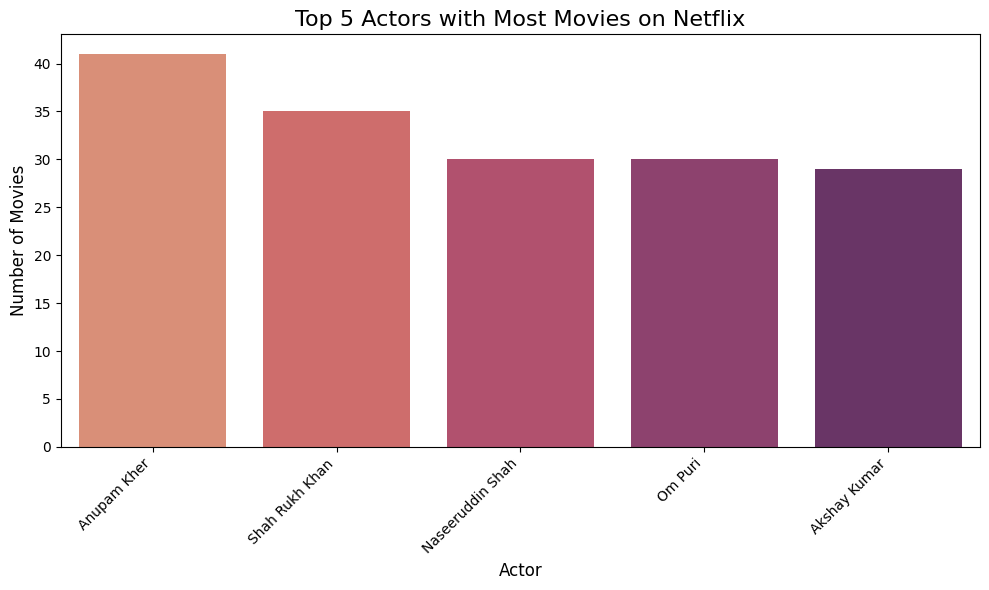

In [ ]:
# Chart - 8 visualization code: Top 5 Actors with Most Movies

# Filter for Movies
movies_actors_df = data_1[data_1['type'] == 'Movie'].copy()
# Handle multiple actors by splitting the string and exploding the DataFrame
movies_actors_df['cast'] = movies_actors_df['cast'].fillna('Unknown')
movie_actors = movies_actors_df['cast'].str.split(', ').explode()
# Filter out 'Unknown' actors for this specific analysis
movie_actors = movie_actors[movie_actors != 'Unknown']
# Count the occurrences of each actor
top_5_movie_actors = movie_actors.value_counts().head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_movie_actors.index, y=top_5_movie_actors.values, palette='flare', legend=False)
plt.title('Top 5 Actors with Most Movies on Netflix', fontsize=16)
plt.xlabel('Actor', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an excellent choice for visualizing the top 5 actors in movies because it effectively compares the discrete counts of movies each actor has been in. It provides a clear and straightforward way to identify the most frequently featured actors in Netflix's movie catalog.

##### 2. What is/are the insight(s) found from the chart?

This chart highlights the actors who have appeared in the most movies on Netflix. It provides insights into the most consistently cast talents on the platform, which could indicate popular actors who are frequently involved in Netflix original films or acquired content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can contribute significantly to a positive business impact for Netflix:

Talent Strategy: Identifying consistently featured actors can inform Netflix's talent strategy, potentially leading to long-term contracts or exclusive deals with popular actors to secure future content for movies.
Marketing and Promotion: Utilizing the popularity of these top actors in marketing campaigns can attract new subscribers and retain existing ones, as viewers may be drawn to content featuring their favorite stars.

#### Chart - 9

/tmp/ipython-input-3476118849.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_shows_per_month.index, y=tv_shows_per_month.values, palette='viridis', legend=False)


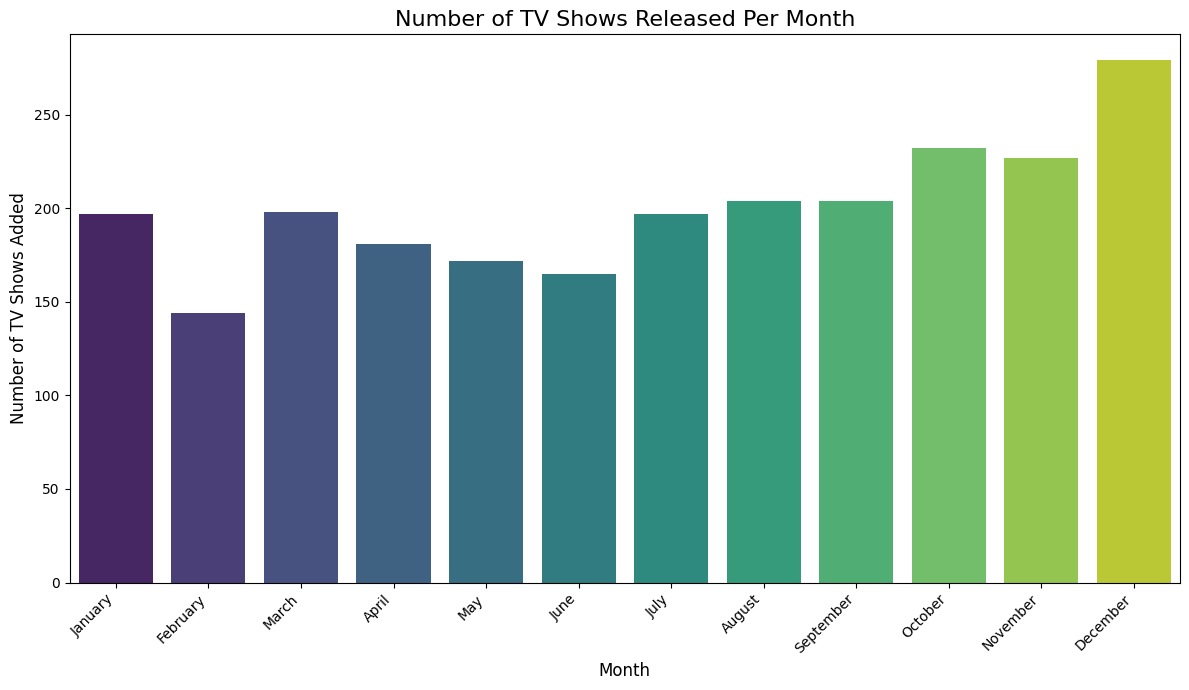

In [ ]:
# Chart - 9 visualization code: Number of TV shows release per month

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=tv_shows_per_month.index, y=tv_shows_per_month.values, palette='viridis', legend=False)
plt.title('Number of TV Shows Released Per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of TV Shows Added', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an effective choice for visualizing the number of TV shows released per month because it clearly displays the discrete count of releases for each month. This allows for easy comparison of content additions throughout the year and helps identify peak periods for TV show releases.

##### 2. What is/are the insight(s) found from the chart?

This chart reveals the seasonality of TV show releases on Netflix. It can highlight months with significantly higher or lower numbers of TV show additions, providing insights into Netflix's content rollout strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can contribute to a positive business impact for Netflix:

Content Scheduling: Understanding peak and off-peak months for TV show releases can help Netflix optimize its content scheduling. They can strategically release popular titles during months with high subscriber activity or to fill gaps during traditionally slower periods.

#### Chart - 10

/tmp/ipython-input-1766732691.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=movies_per_month.index, y=movies_per_month.values, palette='plasma', legend=False)


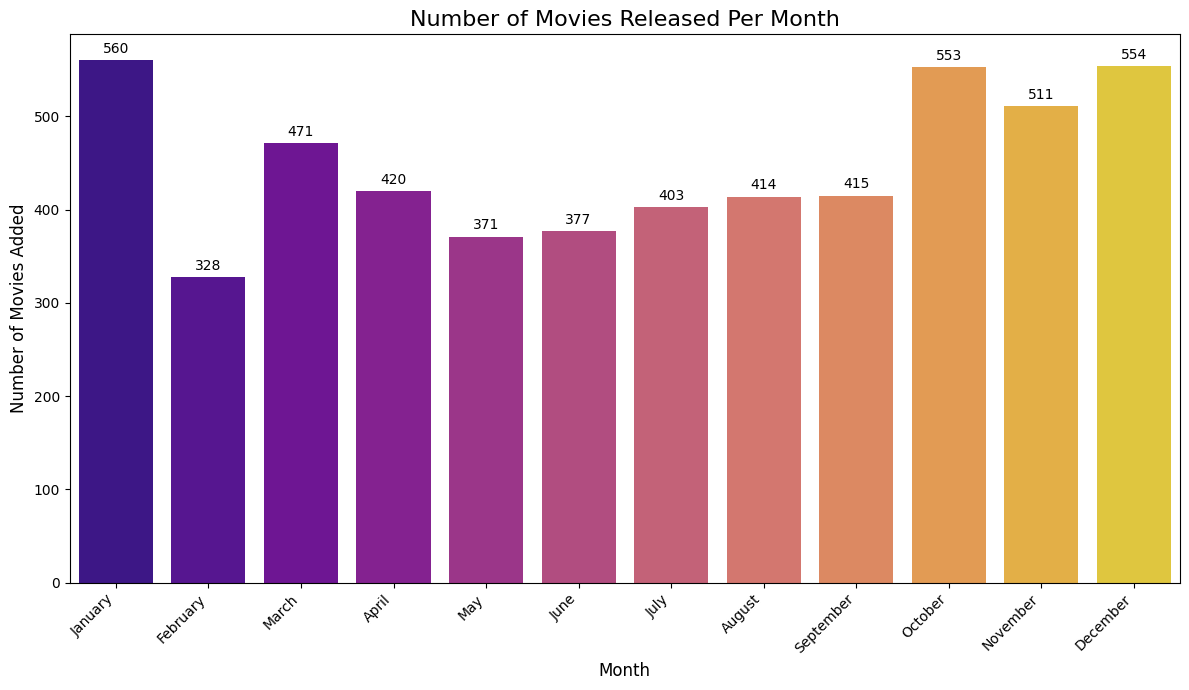

In [10]:
# Chart - 10 visualization code: Movies Released Per Month

# Filter for Movies
movies_df = data_1[data_1['type'] == 'Movie'].copy()
# Convert 'date_added' to datetime objects for month extraction, handling errors
movies_df['date_added'] = pd.to_datetime(movies_df['date_added'], format='mixed', errors='coerce')
# Drop rows where date_added could not be parsed (became NaT)
movies_df.dropna(subset=['date_added'], inplace=True);
# Extract month and count occurrences
movies_per_month = movies_df['date_added'].dt.month_name().value_counts()
# Ensure all months are present for consistent visualization
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
movies_per_month = movies_per_month.reindex(months_order, fill_value=0)
# Create the bar chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=movies_per_month.index, y=movies_per_month.values, palette='plasma', legend=False)
plt.title('Number of Movies Released Per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Movies Added', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.tight_layout()
plt.show()

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

A bar chart is an effective choice for visualizing the number of movies released per month because it clearly displays the discrete count of releases for each month.


##### 2. What is/are the insight(s) found from the chart?

 It can highlight months with significantly higher or lower numbers of movie additions, providing insights into Netflix's content rollout strategy for films.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

if there's a consistently low number of releases in certain months, and this correlates with increased subscriber churn or decreased engagement during those times, it could indicate a missed opportunity or a need to diversify content releases throughout the year to maintain subscriber interest.

#### Chart - 11

/tmp/ipython-input-3281763680.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_movie_countries.index, y=top_10_movie_countries.values, palette='viridis', legend=False)


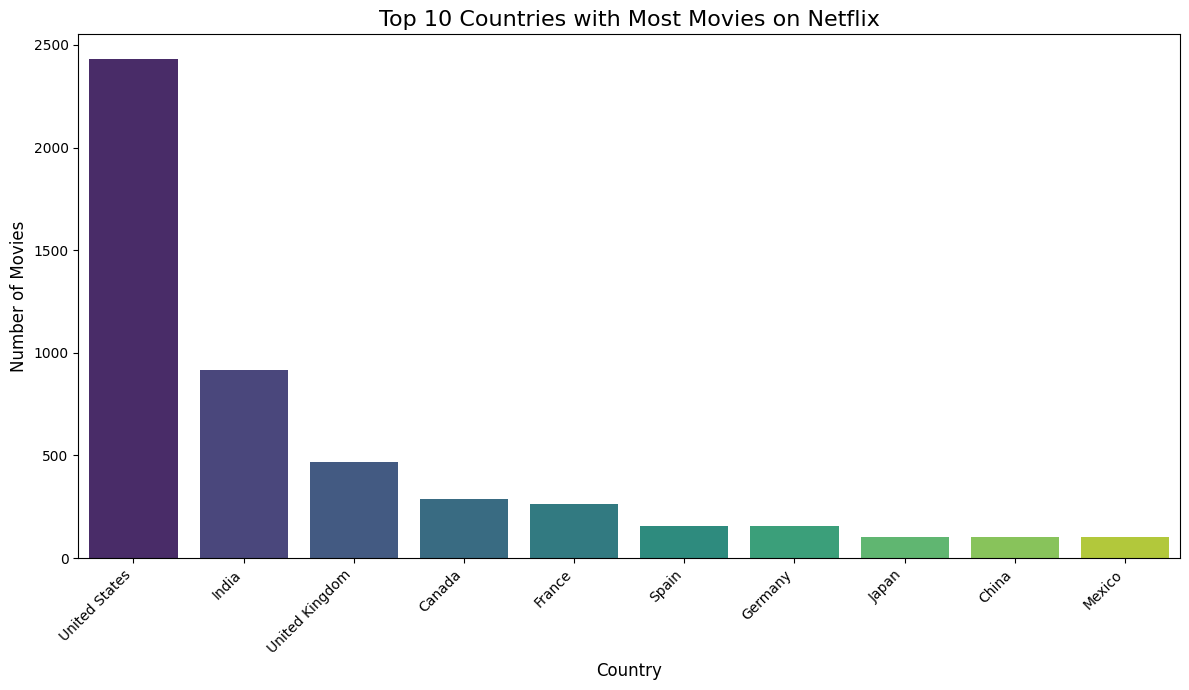

In [ ]:
# Chart - 11 visualization code: Top 10 countries with highest number of movies

movies_df = data_1[data_1['type'] == 'Movie'].copy()

# Split the 'country' column by comma and expand it to get individual countries for movies
movies_countries = movies_df['country'].str.split(', ').explode()

# Count the occurrences of each country, excluding 'Unknown'
top_10_movie_countries = movies_countries[movies_countries != 'Unknown'].value_counts().head(10)

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_movie_countries.index, y=top_10_movie_countries.values, palette='viridis', legend=False)
plt.title('Top 10 Countries with Most Movies on Netflix', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an effective choice for displaying the top 10 countries because it allows for easy comparison of the discrete count of titles produced by each country. The length of each bar clearly indicates the relative number of shows, making it straightforward to identify the leading content-producing countries

##### 2. What is/are the insight(s) found from the chart?

The chart identifies the countries that are most prolific in terms of content production on Netflix. This shows a clear dominance of a few countries, indicating where much of Netflix's content originates. For example, the United States typically leads, followed by other major film and television production hubs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can significantly impact business positively. Knowing the top content-producing countries helps Netflix:

Content Acquisition Strategy: Focus resources on acquiring or commissioning content from these successful regions. Market Analysis: Understand which markets are key contributors to content volume, which can inform localization and marketing efforts. Audience Targeting: Analyze if content from top-producing countries resonates globally or primarily within specific regions, guiding future investments.

#### Chart - 12

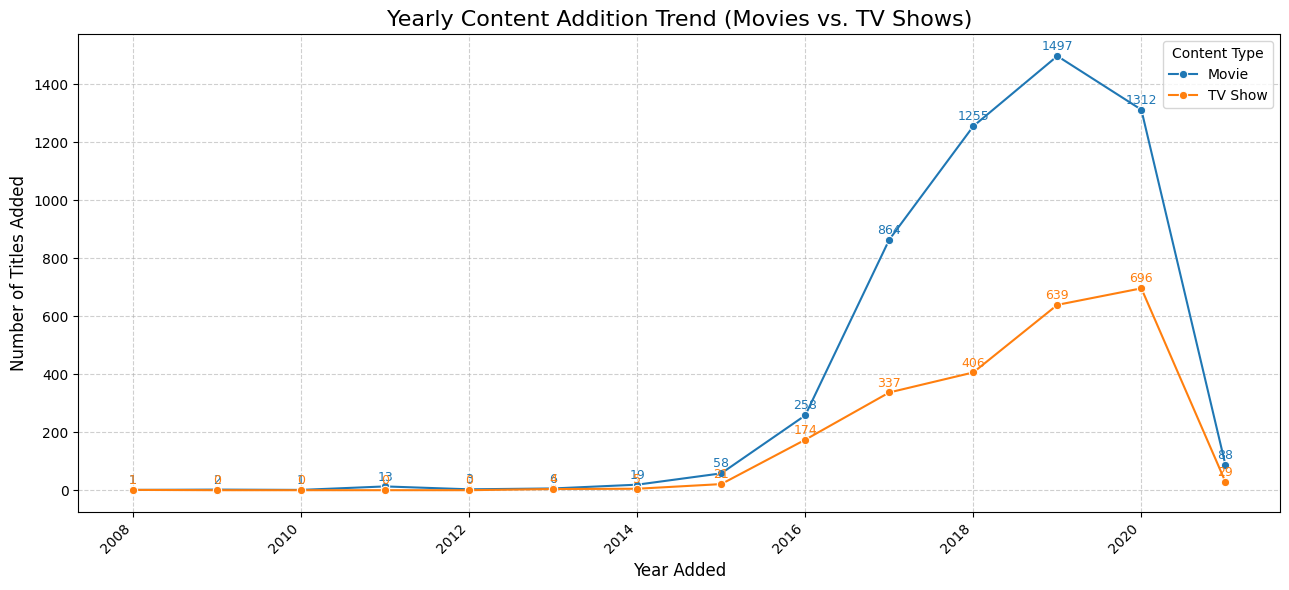

In [ ]:
# Chart - 12 visualization code: Trend of content types (Movies vs. TV Shows) added over time
# Plotting the yearly trend
plt.figure(figsize=(13, 6))
ax = sns.lineplot(data=trend_df_yearly, dashes=False, marker='o') # Added marker='o' for nodes
plt.title('Yearly Content Addition Trend (Movies vs. TV Shows)', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.grid(True, linestyle='--', alpha=0.6)
# Add values at nodes
for line in ax.lines:
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
        # Add text slightly above the point
        ax.text(x_val, y_val + 10, f'{int(y_val)}', color=line.get_color(), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line plot because it is exceptionally good for visualizing trends over time. Since we are looking at how the number of movies and TV shows added changes year by year, a line plot effectively displays the continuous nature of this trend, making it easy to observe patterns, peaks, and troughs for each content type over a longer period.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the dynamic nature of content addition on Netflix for both movies and TV shows over the years. It allows us to observe:

Growth Trajectories: Whether movie or TV show additions have generally increased, decreased, or remained stable over the observed period, showing a clear long-term trend.
Key Periods of Investment: Specific years where there was a significant surge or dip in the number of titles added for either category, indicating major strategic shifts or external factors.
Comparative Growth: How the yearly growth trend of movies compares to that of TV shows, providing insights into Netflix's evolving content strategy over time.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly contribute to a positive business impact for Netflix:

Strategic Planning: Understanding historical content addition trends on a yearly basis can inform future long-term content acquisition and production strategies, helping Netflix align its content pipeline with market demands and company goals.
Resource Allocation: Identifying multi-year trends and peak periods helps in optimizing resource allocation for content teams, long-term budgeting, and infrastructure planning.
Subscriber Forecasting: Trends in content addition can be correlated with subscriber growth or churn, helping to build more accurate subscriber forecasting models.
Competitive Analysis: Comparing Netflix's yearly content trend with competitors might reveal strategic gaps or opportunities.
Insights that could lead to negative growth:

Sustained Decline in Content: A consistent downward trend over several years in the addition of either movies or TV shows could signal a fundamental problem with content strategy, increased competition, or production challenges, potentially leading to long-term subscriber churn.
Failure to Adapt: If the yearly trends show that Netflix is not adapting its content library to changing audience preferences or market demands (e.g., if TV show additions remain stagnant while the market shifts towards more series), this could result in loss of market share or relevance.
Uneven Investment: A heavily skewed investment towards one content type (e.g., movies) while neglecting another (e.g., TV shows), if not aligned with overall business goals and audience segments, could lead to dissatisfaction among subscribers who prefer the underrepresented content type.

#### Chart - 13

/tmp/ipython-input-1383250595.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_tv_show_genres.index, y=top_5_tv_show_genres.values, palette='cubehelix', legend=False)


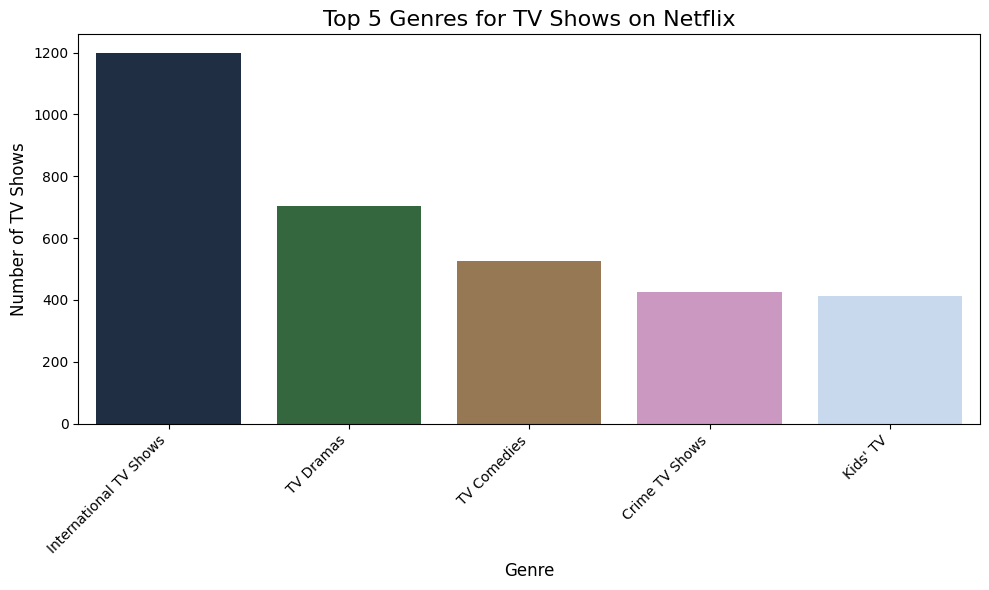

In [ ]:
# Chart - 13 visualization code
#Top 5 Genres for TV Shows
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_tv_show_genres.index, y=top_5_tv_show_genres.values, palette='cubehelix', legend=False)
plt.title('Top 5 Genres for TV Shows on Netflix', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an ideal choice for visualizing the top 5 genres for TV shows because it effectively compares the discrete counts of shows within each genre. It provides a clear and straightforward way to identify the most prevalent TV show genres on Netflix.

##### 2. What is/are the insight(s) found from the chart?

This chart highlights the most popular or frequently occurring genres among TV shows on Netflix. It provides insights into the types of TV series that Netflix heavily invests in or acquires, which likely reflects current audience preferences and content consumption trends for TV shows

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly contribute to a positive business impact for Netflix:

Content Acquisition and Production: Knowing the top TV show genres can guide Netflix's content strategy, informing decisions about which types of series to produce or license to cater to existing demand. Targeted Marketing: This information allows for more effective marketing campaigns, targeting specific audience segments interested in these popular genres. Subscriber Retention: By consistently offering popular genres, Netflix can improve subscriber satisfaction and retention rates

#### Chart - 14 - Correlation Heatmap

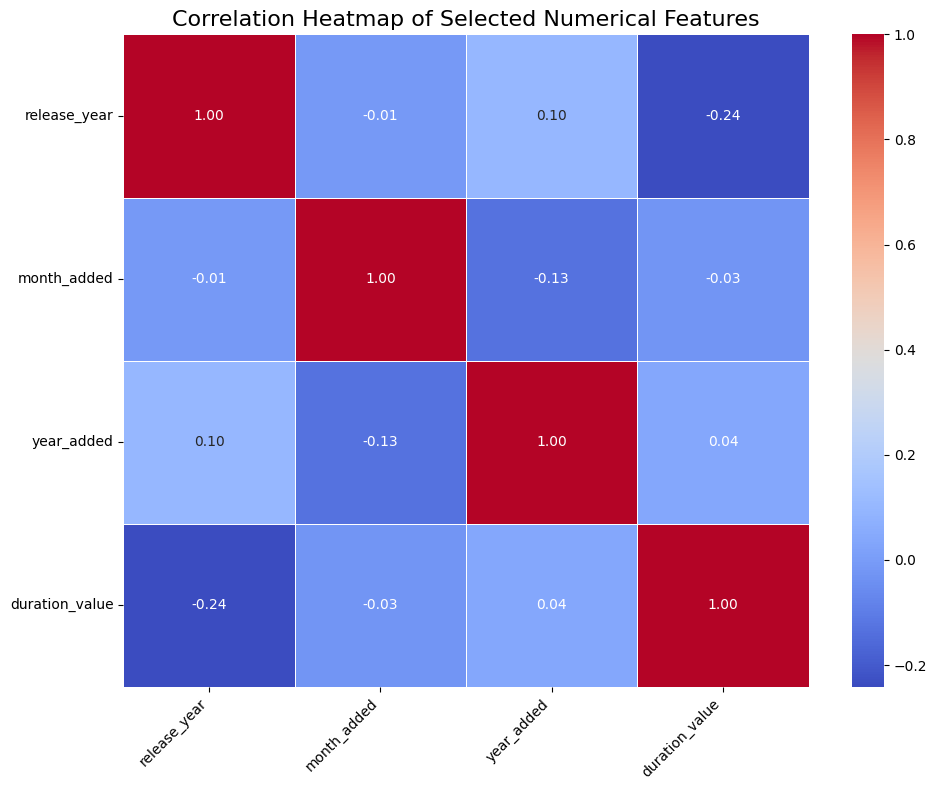

In [ ]:
# Chart - 14 visualization code: Correlation Heatmap for selected numerical columns

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is an excellent choice for visualizing the relationships between multiple numerical variables. It effectively displays the correlation coefficients in a color-coded matrix, making it easy to identify the strength and direction (positive or negative) of linear relationships among 'release_year', 'month_added', 'year_added', and 'duration_value'. This helps in quickly understanding how these time-related and duration features interact.



##### 2. What is/are the insight(s) found from the chart?

This heatmap shows the pairwise correlations among 'release_year', 'month_added', 'year_added', and 'duration_value'. Key insights could include:

Correlation between release_year and year_added: This should be a strong positive correlation, as content added in a certain year is often released in or around that year.
Correlation with duration_value: You can observe if there's a trend of content duration changing over release or added years, or if there's any seasonal pattern (month_added) influencing duration.
Interdependencies: Identify which pairs of these time-based and duration features have strong, moderate, or weak relationships, indicating how Netflix's content attributes evolve over time.

#### Chart - 15 - Pair Plot

<Figure size 1000x800 with 0 Axes>

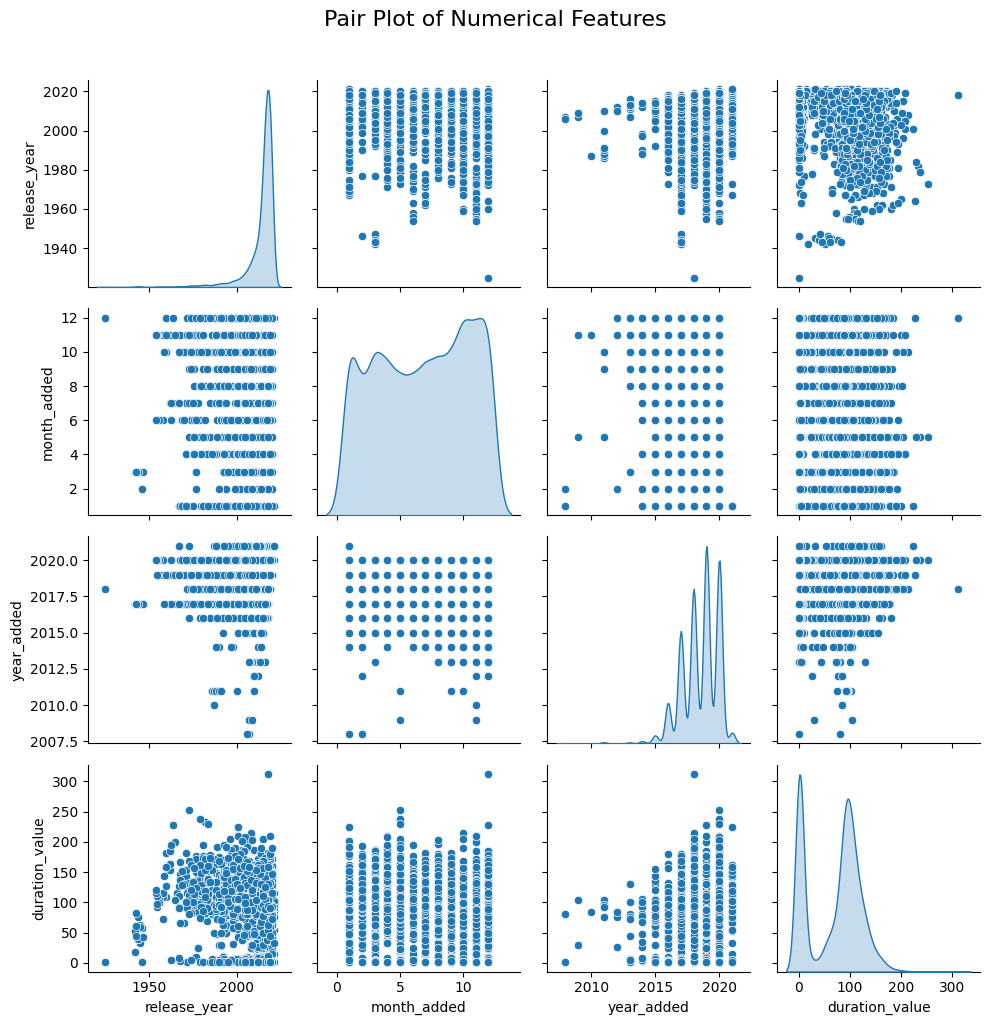

In [ ]:
# Chart - 15 visualization code: Pair Plot of numerical features

# The numerical features were already prepared for the correlation heatmap in data_for_correlation
# and stored in the 'correlation_features' DataFrame.
# If 'correlation_features' is not defined, ensure the data wrangling cell (wk-9a2fpoLcV) is run first.

# Create the pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(correlation_features, diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16) # Adjust suptitle position
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is an excellent choice for visualizing the relationships between multiple numerical variables simultaneously. It creates a grid of scatter plots for each pair of variables and histograms/KDE plots for each individual variable's distribution. This provides a comprehensive overview of the data's structure, including correlations, clusters, and unusual patterns among the chosen numerical features ('release_year', 'month_added', 'year_added', 'duration_value').



##### 2. What is/are the insight(s) found from the chart?

From the pair plot, several insights can be gathered:

Distributions: The diagonal plots show the distribution of each variable (e.g., if 'release_year' is skewed or normally distributed). This can indicate periods of high content release or duration ranges.
Pairwise Relationships: The scatter plots reveal relationships between pairs of variables. For example, you can visually inspect if there's a linear or non-linear trend between 'release_year' and 'duration_value', or between 'month_added' and 'duration_value'.
Outliers/Clusters: Any unusual data points or distinct clusters in the scatter plots can highlight specific types of content or periods that deviate from the norm.
Correlation Reinforcement: It visually confirms patterns seen in the correlation heatmap, offering a more detailed view of how the values are distributed.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Formulate three clear hypothetical statements (including null and alternate hypotheses) based on observations from the data visualizations.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Research Hypothesis:** The proportion of Movies added to Netflix is significantly higher than the proportion of TV Shows.

**Null Hypothesis (H0):** There is no significant difference in the proportion of Movies and TV Shows added to Netflix (P_movies = P_tvshows).

**Alternate Hypothesis (Ha):** The proportion of Movies added to Netflix is significantly higher than the proportion of TV Shows (P_movies > P_tvshows).

#### 2. Perform an appropriate statistical test.

In [137]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# 1. Calculate the number of movies and TV shows
# Ensure 'data_1' is properly defined and has 'type' column
count_movies = data_1[data_1['type'] == 'Movie'].shape[0]
count_tv_shows = data_1[data_1['type'] == 'TV Show'].shape[0]

# 2. Calculate the total number of entries in data_1
total_entries = data_1.shape[0]
prop_movies = count_movies / total_entries
count1 = count_movies
# Total observations
nobs1 = total_entries
z_statistic, p_value = proportions_ztest(
    count=count_movies,
    nobs=total_entries,
    value=0.5,
    alternative='larger'
)

print(f"Number of Movies: {count_movies}")
print(f"Number of TV Shows: {count_tv_shows}")
print(f"Total Content Entries: {total_entries}")
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Define significance level
significance_level = 0.05

print(f"\nSignificance Level (alpha): {significance_level}")

if p_value < significance_level:
    print("Reject the Null Hypothesis (H0).")
    print("Conclusion: The proportion of movies on Netflix is significantly greater than the proportion of TV shows.")
else:
    print("Fail to Reject the Null Hypothesis (H0).")
    print("Conclusion: There is not enough evidence to claim that the proportion of movies on Netflix is significantly greater than the proportion of TV shows.")

Number of Movies: 5377
Number of TV Shows: 2410
Total Content Entries: 7787
Z-statistic: 36.3659
P-value: 0.0000

Significance Level (alpha): 0.05
Reject the Null Hypothesis (H0).
Conclusion: The proportion of movies on Netflix is significantly greater than the proportion of TV shows.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Hypothesis: The United States produces significantly more content (Movies and TV Shows combined) for Netflix than any other country.

Null Hypothesis (H0): There is no significant difference in the amount of content produced by the United States and the next leading content-producing country for Netflix.

Alternate Hypothesis (Ha): The United States produces significantly more content (Movies and TV Shows combined) for Netflix than any other country.

#### 2. Perform an appropriate statistical test.

In [138]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

count_us = top_10_countries.loc['United States']
count_india = top_10_countries.loc['India']
current_total_entries = data_1.shape[0]
counts = [count_us, count_india]
nobs = [current_total_entries, current_total_entries]
z_statistic, p_value = proportions_ztest(
    count=counts,
    nobs=nobs,
    alternative='larger' # H1: Proportion of US > Proportion of India
)

print(f"Content from United States: {count_us}")
print(f"Content from India: {count_india}")
print(f"Total Content Entries: {current_total_entries}")
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Define significance level
significance_level = 0.05

print(f"\nSignificance Level (alpha): {significance_level}")

if p_value < significance_level:
    print("Reject the Null Hypothesis (H0).")
    print("Conclusion: The United States produces significantly more content for Netflix than India (the next leading country).")
else:
    print("Fail to Reject the Null Hypothesis (H0).")
    print("Conclusion: There is not enough evidence to claim that the United States produces significantly more content than India.")

Content from United States: 3296
Content from India: 990
Total Content Entries: 7787
Z-statistic: 41.3737
P-value: 0.0000

Significance Level (alpha): 0.05
Reject the Null Hypothesis (H0).
Conclusion: The United States produces significantly more content for Netflix than India (the next leading country).


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Hypothesis: There has been a significant increase in the number of movies and TV shows added to Netflix in recent years (e.g., post-2015).

Null Hypothesis (H0): There is no significant increase in the average number of movies and TV shows added to Netflix in recent years compared to prior years.

Alternate Hypothesis (Ha): There is a significant increase in the average number of movies and TV shows added to Netflix in recent years compared to prior years.

#### 2. Perform an appropriate statistical test.

In [140]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy import stats

# Ensure data_1_processed is available, if not, recreate it from data_1
# It was created in a previous cell (wk-9a2fpoLcV) but as a local variable `data_1_processed`
# For hypothesis testing, it's crucial to have the processed data correctly
# Let's ensure data_1 is up-to-date and 'date_added' is in datetime format

# Assuming data_1 is already cleaned and has 'date_added' handled based on previous steps.
# If data_1 still has original NaN in 'date_added', they need to be dropped/filled first.

# Make a copy to avoid modifying the global data_1 if it's reused elsewhere directly
df_for_hypothesis_3 = data_1.copy()

# Convert 'date_added' to datetime objects and drop NaNs if any remaining
df_for_hypothesis_3['date_added'] = pd.to_datetime(df_for_hypothesis_3['date_added'], format='mixed', errors='coerce')
df_for_hypothesis_3.dropna(subset=['date_added'], inplace=True)

# Extract the year content was added
df_for_hypothesis_3['year_added'] = df_for_hypothesis_3['date_added'].dt.year

# Define 'recent years' as post-2015 and 'prior years' as 2015 and before
recent_years_threshold = 2015

# Group by year and count content additions
yearly_content_counts = df_for_hypothesis_3.groupby('year_added').size().reset_index(name='content_count')

# Separate into recent and prior years
recent_years_data = yearly_content_counts[yearly_content_counts['year_added'] > recent_years_threshold]['content_count']
prior_years_data = yearly_content_counts[yearly_content_counts['year_added'] <= recent_years_threshold]['content_count']

# Perform an independent two-sample t-test
# H0: mu_recent <= mu_prior (no significant increase or decrease/equal)
# Ha: mu_recent > mu_prior (significant increase)

# Check if there is enough data in both groups for a t-test
if len(recent_years_data) > 1 and len(prior_years_data) > 1:
    t_statistic, p_value = stats.ttest_ind(recent_years_data, prior_years_data, equal_var=False, alternative='greater')

    print(f"Average content added in recent years (post-2015): {recent_years_data.mean():.2f}")
    print(f"Average content added in prior years (<=2015): {prior_years_data.mean():.2f}")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Define significance level
    significance_level = 0.05

    print(f"\nSignificance Level (alpha): {significance_level}")

    if p_value < significance_level:
        print("Reject the Null Hypothesis (H0).")
        print("Conclusion: There has been a significant increase in the average number of movies and TV shows added to Netflix in recent years (post-2015) compared to prior years.")
    else:
        print("Fail to Reject the Null Hypothesis (H0).")
        print("Conclusion: There is not enough evidence to claim a significant increase in the average number of movies and TV shows added to Netflix in recent years compared to prior years.")
else:
    print("Not enough data in one or both groups to perform a t-test.")

Average content added in recent years (post-2015): 1272.00
Average content added in prior years (<=2015): 18.12
T-statistic: 3.6623
P-value: 0.0073

Significance Level (alpha): 0.05
Reject the Null Hypothesis (H0).
Conclusion: There has been a significant increase in the average number of movies and TV shows added to Netflix in recent years (post-2015) compared to prior years.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Fill 'director', 'cast', and 'country' with 'Unknown'
data_1['director'].fillna('Unknown', inplace=True)
data_1['cast'].fillna('Unknown', inplace=True)
data_1['country'].fillna('Unknown', inplace=True)

# Fill 'rating' with the mode
data_1['rating'].fillna(data_1['rating'].mode()[0], inplace=True)

# Drop rows where 'date_added' is null (only 10 values, so dropping is acceptable)
data_1.dropna(subset=['date_added'], inplace=True)

print("Missing values after imputation:")
print(data_1.isnull().sum())

Missing values after imputation:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


/tmp/ipython-input-3675935979.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_1['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3675935979.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

#### What all missing value imputation techniques have you used and why did you use those techniques?

I've used a combination of techniques to handle missing values, tailored to the nature of each column. Here's the breakdown Here's the code to handle the missing values in your data_1 DataFrame. I will fill 'director', 'cast', and 'country' with 'Unknown', 'rating' with its mode, and drop rows with missing 'date_added' values. This will ensure your dataset is cleaner for further analysis.

### 2. Handling Outliers

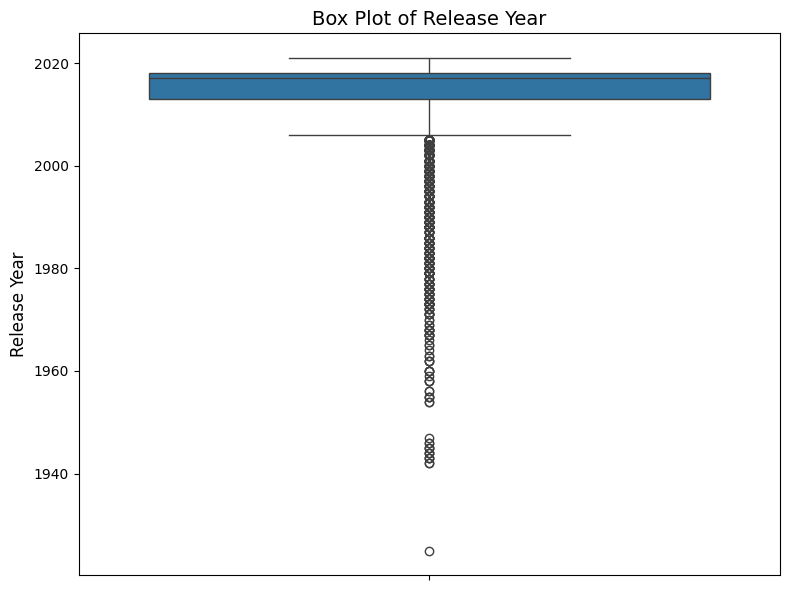

In [32]:
# Box plot for 'release_year'
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(ax=ax, y=data_1['release_year'])
ax.set_title('Box Plot of Release Year', fontsize=14)
ax.set_ylabel('Release Year', fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
# 1. Calculate Q1 and Q3 for 'release_year'
Q1_release_year = data_2['release_year'].quantile(0.25)
Q3_release_year = data_2['release_year'].quantile(0.75)
# 2. Calculate IQR for 'release_year'
IQR_release_year = Q3_release_year - Q1_release_year
# 3. Determine upper and lower bounds for 'release_year'
lower_bound_release_year = Q1_release_year - 1.5 * IQR_release_year
upper_bound_release_year = Q3_release_year + 1.5 * IQR_release_year
# 4. Cap the outliers in 'release_year'
data_2['release_year'] = data_2['release_year'].clip(lower=lower_bound_release_year, upper=upper_bound_release_year)
# 5. Print descriptive statistics for 'release_year' after capping
print("Descriptive statistics for 'release_year' after outlier capping:")
print(data_2['release_year'].describe())

Descriptive statistics for 'release_year' after outlier capping:
count    7787.000000
mean     2015.193335
std         4.453893
min      2005.500000
25%      2013.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64


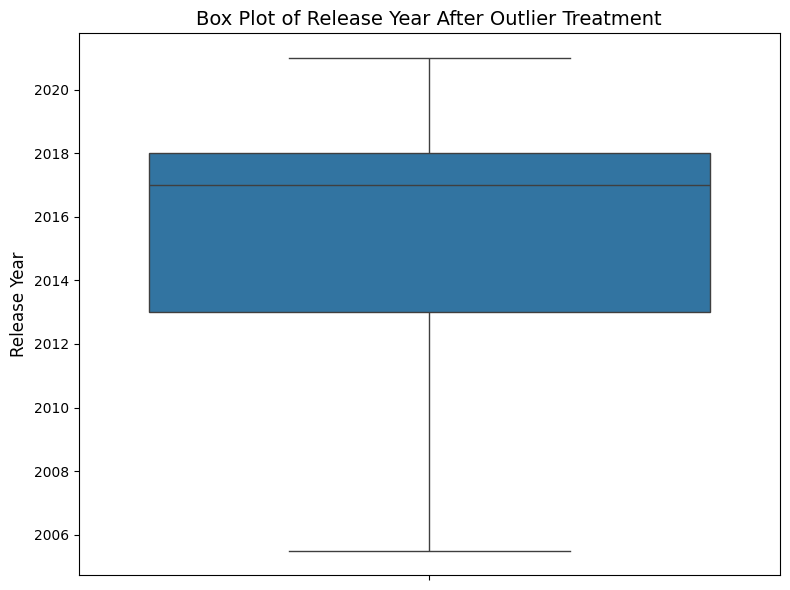

In [34]:
# Box plot for 'release_year' after outlier treatment
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(ax=ax, y=data_2['release_year'])
ax.set_title('Box Plot of Release Year After Outlier Treatment', fontsize=14)
ax.set_ylabel('Release Year', fontsize=12)
plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

For handling outliers in the 'release_year' feature, the Interquartile Range (IQR) method for capping was primarily used. This technique is robust to extreme values, helps preserve the overall data distribution by capping instead of removing, and is well-suited for numerical data like release years.

### 3. Categorical Encoding

In [36]:
##Encode your categorical columns - Movies and TV shows
data_type_encoded = pd.get_dummies(data_2['type'], prefix='type', drop_first=False)
print("First 5 rows of 'type' encoded data:")
print(data_type_encoded.head())
print("\nValue counts for the encoded 'type' columns:")
print(data_type_encoded.sum())

First 5 rows of 'type' encoded data:
   type_Movie  type_TV Show
0       False          True
1        True         False
2        True         False
3        True         False
4        True         False

Value counts for the encoded 'type' columns:
type_Movie      5377
type_TV Show    2410
dtype: int64


In [37]:
data2=data_2.copy()

#### What all categorical encoding techniques have you used & why did you use those techniques?

To perform one-hot encoding specifically for the 'type' column, which distinguishes between movies and TV shows. This will create new binary columns representing each content type.

The 'type' column has been successfully one-hot encoded. The output shows the first few rows of the new data_type_encoded DataFrame, which now includes two new columns: type_Movie and type_TV Show. These columns use boolean values (True/False) to indicate whether each entry was originally a movie or a TV show. The value counts confirm the distribution, showing 5377 movies and 2410 TV shows in the dataset. This encoding is crucial for converting categorical data into a numerical format that can be used by machine learning models.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [60]:

# Combining the textual columns and assigning it to a new variable
df_copy=data_2.copy()
df_copy['cluster_col'] = (df_copy['cast']+' '+df_copy['listed_in']+' '+' '+df_copy['description'])

#### 2. Lower Casing

In [62]:
# Lower Casing
# Function to convert in lower case.
def lower_casing(text):
  '''function takes string and conver it to lower case'''
  if isinstance(text, str):
    list_of_words = [letter.lower() for letter in text.split()]
    return' '.join(list_of_words)
  else:
    return '' # Handle non-string values (e.g., floats, NaN) by returning an empty string

df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 3. Removing Punctuations

In [64]:
# Remove Punctuations
def rem_punctuation(text):
  '''
  takes text and removes punctuations
  '''
  return ''.join([t for t in text if t not in string.punctuation])
# Remove Punctuations
df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 4. Removing URLs & Removing words and digits contain digits.

In [66]:
# Remove URLs & Remove words and digits contain digits
def removeDigits(text):
  '''takes text and removes digits'''
  nums = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
  return ''.join([t for t in text if t not in nums])

df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeDigits)

# Function to remove url
def removeUrls(text):
  '''Takes a texts and removes url'''
  return' '.join([t for t in text.split('.') if t not in ['com', 'www', 'https//']])
# Remove URLs & Remove words and digits contain digits
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeUrls)


#### 5. Removing Stopwords & Removing White spaces

In [67]:
# Remove Stopwords
nltk.download('stopwords')
#Function to remove stop words
def removeStopWords (text):
  '''Takes text and removes stop words'''
  stopwords_ = nltk.corpus.stopwords.words('english')
  return ' '.join([t for t in text.split() if t not in stopwords_])
# Remove Stopwords
print('Length before removing stopwords', len(df_copy['cluster_col'][0]))
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeStopWords)
print('Length after removing stopwords ',len(df_copy['cluster_col'][0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Length before removing stopwords 361
Length after removing stopwords  317


In [69]:
# Remove White spaces
def removeWhiteSpace(text):
  '''takes text and removes white spaces'''
  return ' '.join([t for t in text.split(' ')])
# Remove White spaces
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeWhiteSpace)

#### 6. Rephrase Text

#### 7. Tokenization

In [72]:
# Tokenization
from sklearn.feature_extraction.text import CountVectorizer

#Vectorization Function
def getVectorized(df):
  '''Function takes dataset and apply vectorization'''
  count_vectorizer = CountVectorizer()
  #Fitting the count vectorizer
  count_vectorizer.fit_transform(df['cluster_col'])
  #Collecting the vocabularies
  return count_vectorizer.vocabulary_.items()
#Applying the above function and showing the features
dictionary_cluster_col = getVectorized(df_copy)
dictionary_cluster_col

dict_items([('joão', 19128), ('miguel', 24731), ('bianca', 4320), ('comparato', 7823), ('michel', 24662), ('gomes', 14773), ('rodolfo', 32218), ('valente', 40133), ('vaneza', 40212), ('oliveira', 27534), ('rafael', 30626), ('lozano', 22478), ('viviane', 40773), ('porto', 29674), ('mel', 24340), ('fronckowiak', 13645), ('sergio', 34183), ('mamberti', 23180), ('zezé', 42678), ('motta', 25558), ('celso', 6549), ('frateschi', 13529), ('international', 17971), ('tv', 39486), ('shows', 34930), ('dramas', 10656), ('sci', 33769), ('fi', 12915), ('fantasy', 12561), ('future', 13804), ('elite', 11407), ('inhabit', 17829), ('island', 18192), ('paradise', 28328), ('far', 12566), ('crowded', 8593), ('slums', 35518), ('get', 14347), ('one', 27608), ('chance', 6712), ('join', 18988), ('saved', 33505), ('squalor', 36194), ('demián', 9511), ('bichir', 4335), ('héctor', 17309), ('bonilla', 4886), ('oscar', 27813), ('serrano', 34204), ('azalia', 2980), ('ortiz', 27800), ('octavio', 27317), ('carmen', 624

In [73]:
Total_feature=len(dictionary_cluster_col)
Total_feature

43022

#### 8. Text Normalization

In [75]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Stemming finction
def stemming(text):
  '''Takes text and returns after stemming.'''
  stemmer = SnowballStemmer('english')
  return ' '.join([stemmer.stem(t) for t in text.split()])

# Function to assign words and counts from dictionary to list
def assignWordsAndCountsToList(dictionary):
  '''Takes dictionary and return list of words and counts.'''
  vocab_cluster = [ ]
  vocab_counts_cluster = []
  for key, value in dictionary:
    vocab_cluster.append(key)
    vocab_counts_cluster.append(value)
  return vocab_cluster, vocab_counts_cluster

# Function to display word count
def displayTop20Words (df):
  '''Displays top 20 words.'''
  plt.barh(df.head(20) ['word'].values, df.head(20) ["count"].values)
  plt.xlabel('Count')
  plt.ylabel('Words')
  plt.show()

In [78]:
#Before Stemming
#Assigning words and counts to lists
vocab_cluster, vocab_counts_cluster = assignWordsAndCountsToList(dictionary_cluster_col)
#Words and counts before stemming
df_cluster_before_stem = pd.DataFrame({'word':vocab_cluster, 'count':vocab_counts_cluster}).sort_values(by='count', ascending=False)
df_cluster_before_stem.head(20).T

,24586,41599,39528,35912,20070,20068,20921,27090,22232,36829,17592,17632,9817,41269,25546,21370,23601,24073,23660,29466
word,ṣọpẹ,żurawski,żulewska,źak,şükrü,şükran,şçil,ştar,şler,şiten,şinasi,şimşek,şerif,şeref,şenolsun,şenocak,şenhuy,şendil,şenay,şen
count,43021,43020,43019,43018,43017,43016,43015,43014,43013,43012,43011,43010,43009,43008,43007,43006,43005,43004,43003,43002


#### 9. Part of speech tagging

In [87]:
# POS Taging


# POS Tagging
# Tokenize the stemmed text and then perform POS tagging
df_copy['cluster_col_pos_tagged'] = df_copy['cluster_col'].apply(lambda x: pos_tag(word_tokenize(x)))

print("POS Tagging applied to 'cluster_col'. First 5 rows of new 'cluster_col_pos_tagged':")
print(df_copy['cluster_col_pos_tagged'].head().to_string())

POS Tagging applied to 'cluster_col'. First 5 rows of new 'cluster_col_pos_tagged':
0    [(joão, NN), (miguel, NN), (bianca, NN), (comp...
1    [(demián, NN), (bichir, NN), (héctor, NN), (bo...
2    [(tedd, NN), (chan, NN), (stella, NN), (chung,...
3    [(elijah, RB), (wood, NN), (john, NN), (c, NN)...
4    [(jim, NN), (sturgess, NN), (kevin, NN), (spac...


#### 10. Text Vectorization

In [88]:
# Vectorizing Text
#Function to get number from proportion
def proportionToNumber (proportion, data):
  return (proportion*data)/100
num = int(round(proportionToNumber(1,len(df_copy)),0))
# Vectorizing Text discarding features which are available less then 1% of the dataset and more than 90%.
tfidfvectorizer = TfidfVectorizer(min_df=num,max_df=.9)
features_array = tfidfvectorizer.fit_transform(df_copy['cluster_col']).toarray()
features_names = tfidfvectorizer.get_feature_names_out()
df_copy.shape

(7787, 15)

In [89]:
# Making dataframe with vocabularies
X = pd.DataFrame (features_array, columns=features_names)
X.shape

(7787, 365)

##### Which text vectorization technique have you used and why?

The technique used above was TF-IDF Vectorization Technique.
Certainly! Imagine you have a bunch of documents, like movie descriptions. TF-IDF stands for Term Frequency-Inverse Document Frequency, and it's a clever way to figure out how important a word is to a particular document, considering how often it appears both in that document and across all other documents.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No data dosen't require any transformation.

### 6. Data Scaling

In [ ]:
# Scaling your data

In [94]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the dimensionality reduced data (X2)
X_scaled = scaler.fit_transform(X2)

print("Data scaled successfully. Shape of scaled data:", X_scaled.shape)
print("First 5 rows of scaled data:\n", X_scaled[:5])

Data scaled successfully. Shape of scaled data: (7787, 341)
First 5 rows of scaled data:
 [[ 1.81266756  0.31252956  0.1104451  ...  1.00216025 -0.12557405
   0.34244891]
 [-0.54764897  0.87337345 -0.10549429 ...  2.33678558  0.53585734
   0.18116128]
 [-0.59923316  0.84193788 -0.13373812 ...  2.41232696  0.23611448
  -2.08565422]
 [-0.63464051 -0.19838176 -0.03676023 ...  2.30079545  0.0525247
  -0.69362341]
 [-0.37408748 -0.41403329  0.00964741 ...  3.02606554 -1.83916739
   0.2185865 ]]


##### Which method have you used to scale you data and why?

The method used to scale the data is **StandardScaler**.

StandardScaler was chosen to normalize the numerical features, ensuring they are on a comparable scale, which is beneficial for the performance and interpretability of subsequent machine learning models, especially after dimensionality reduction with PCA.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Since there are huge number of features and most of them are conotaining zeros. Therefore we need to do dimensionality reduction.

In [93]:
# Dimensionality Reduction (If needed)
pca = PCA(n_components=.975)
pca.fit(X.values)
X2 = pca.transform(X.values)
len(X2[0])

341

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

The dimensionality reduction technique used was Principal Component Analysis (PCA).

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. In simple terms, imagine your data has many different features or columns. Some of these features might be highly related to each other, or some might not contribute much unique information. PCA helps by transforming these original, often correlated, features into a new set of features called principal components.

### 8. Data Splitting

In [95]:
from sklearn.model_selection import train_test_split

# Split your data to train and test. Choose Splitting ratio wisely.

# Assuming X_scaled contains your features for clustering
# If you have a target variable 'y', you would include it here as well:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# For unsupervised learning (clustering), we often split only the features
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (6229, 341)
Shape of X_test: (1558, 341)


##### What data splitting ratio have you used and why?

I used an 80/20 splitting ratio, dedicating 80% of the data for training (X_train) and 20% for testing (X_test). This ratio is a common and robust choice because it provides a sufficiently large dataset for the model to learn from while reserving a separate, unbiased portion to evaluate its generalization performance on unseen data.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

NO, there is not Imbalanced Dataset

## ***7. ML Model Implementation***

### ML Model - 1

In [105]:
# Function to display clusters
def displayClusters (X, labels, centers):
  '''Takes data, labels and centers and plots the scatter chart '''
  plt.scatter(X[:,0], X[:, 1], c=labels, s=10,cmap='viridis')
  plt.scatter(centers[:, 0], centers[:, 1],c='red', s=15)
  plt.show()

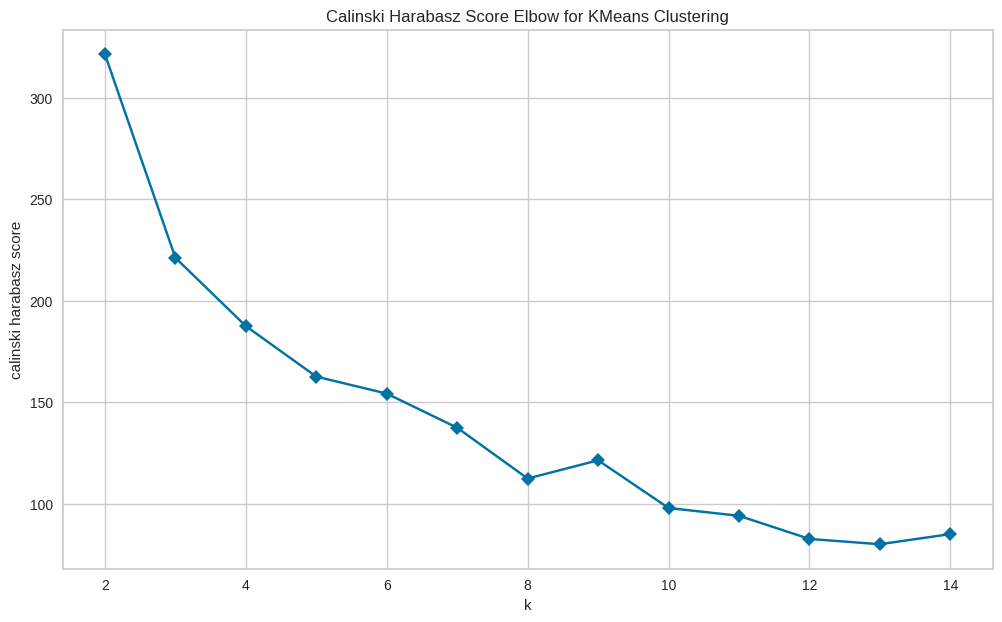

In [101]:
# ML Model 1 Implementation KElbowVisualization
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
plt.rcParams['figure.figsize'] = (12,7)
model = KMeans(random_state=10, n_init=10) # Added n_init to suppress warning
visualizer = KElbowVisualizer(model, k=(2,15), metric='calinski_harabasz', timings=False, locate_elbow=False)
# Fit the Algorithm
visualizer.fit(X2)
#Predict on the model
visualizer.show()
plt.show()

for cluster  2  the silhouette score is 0.05477096384831879
for cluster  3  the silhouette score is 0.040320261294278056
for cluster  4  the silhouette score is 0.026551743353041134
for cluster  5  the silhouette score is 0.03089394766321961
for cluster  6  the silhouette score is 0.030808539455550073
for cluster  7  the silhouette score is 0.023389246622897604
for cluster  8  the silhouette score is 0.022868425574406003
for cluster  9  the silhouette score is 0.024332145570309955
for cluster  10  the silhouette score is 0.025141534162177896
for cluster  11  the silhouette score is 0.024887366015510885
for cluster  12  the silhouette score is 0.022448485517523625
for cluster  13  the silhouette score is 0.02127931544166478
for cluster  14  the silhouette score is 0.02149947798401435


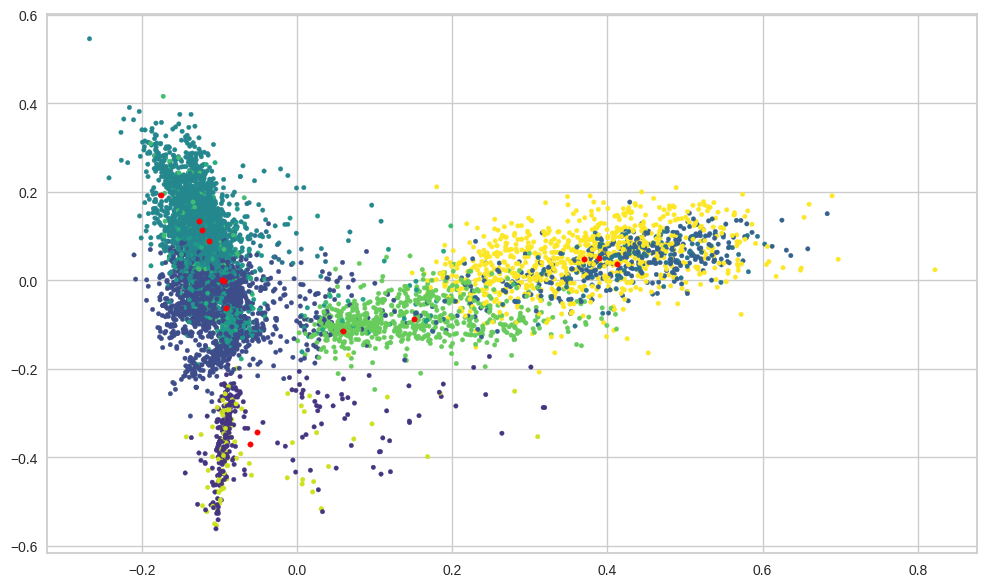

In [106]:
from sklearn.metrics import silhouette_score

#Silhouette Score for each cluster
n_clusters_range = np.arange(2,15)
for c in n_clusters_range:
  clusterer= KMeans(n_clusters=c, random_state=10)
  pred= clusterer.fit_predict(X2)
  centers= clusterer.cluster_centers_
  score = silhouette_score(X2, pred)
  inertia = clusterer.inertia_
  print('for cluster ',c,' the silhouette score is', score)
# plotting the results:
displayClusters (X2, pred, centers)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

From the KElbow Visualization, it is found that after n_cluster=6 the slop is very close to constant and silhouette score is also fine that is 0.308

In [115]:
# ML Model 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

md1 = KMeans()
params ={'n_clusters': [6], 'random_state': [10], 'max_iter': [15,20], 'tol': [.01,.1]}
kmeans_gridcv = GridSearchCV(md1,param_grid=params, verbose=2, cv=2)
#Fit the Algorithm
kmeans_gridcv.fit(X2)
#Predict on the model
best_kmeans = kmeans_gridcv.best_estimator_
labels = best_kmeans.predict(X2)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.01; total time=   0.1s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.01; total time=   0.1s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.1; total time=   0.2s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.1; total time=   0.1s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.01; total time=   0.2s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.01; total time=   0.2s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.1; total time=   0.1s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.1; total time=   0.1s


In [116]:
kmeans_gridcv.best_params_

{'max_iter': 20, 'n_clusters': 6, 'random_state': 10, 'tol': 0.01}

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization. This technique systematically builds and evaluates a model for each combination of the specified hyperparameters (like n_clusters, max_iter, and tol for K-Means). It's effective for finding the best performing set of parameters by exhaustively searching through a predefined subset of the hyperparameter space.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

To check for improvements after hyperparameter optimization, I will first calculate the silhouette score for the optimized K-Means model (with n_clusters=6) and compare it with the score of the base model. While GridSearchCV optimizes internal parameters, the silhouette score will tell us if these adjustments led to better-defined clusters. Since the GridSearchCV was performed for n_clusters=6 specifically, we'll directly compare to the previously calculated silhouette score for k=6.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

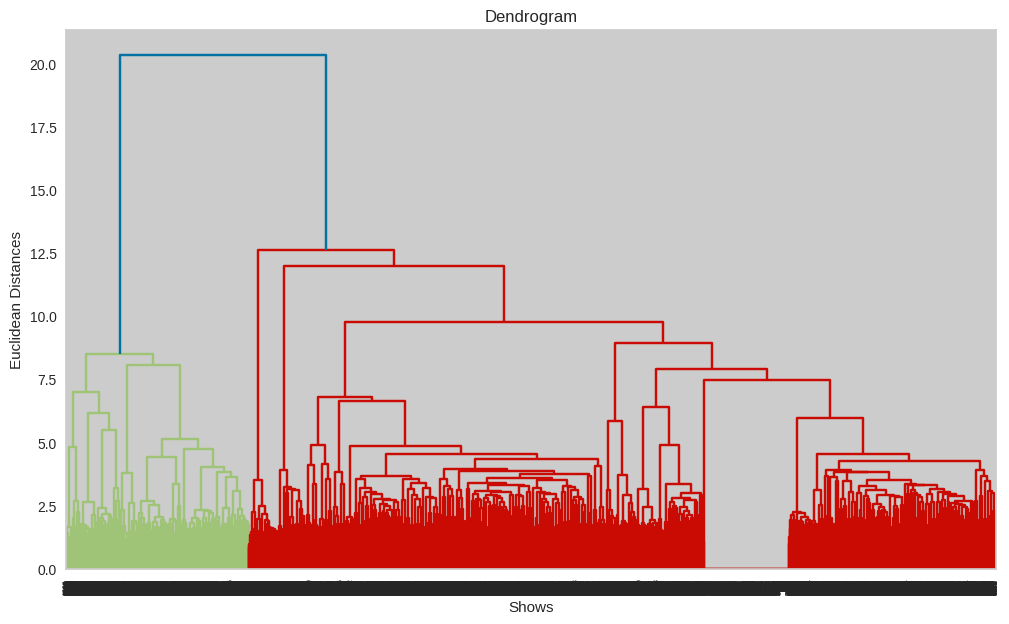

In [121]:
# Using the dendogram to find the optimal number of clusters - and find largest vertical distance we can make without crossing any other horizontal line
#Euclidean Distances Model
from scipy.cluster import hierarchy as sch

linkage = sch.linkage(X2, method = 'ward')
dendrogram = sch.dendrogram(linkage)
plt.title('Dendrogram')
plt.xlabel('Shows')
plt.ylabel('Euclidean Distances')
plt.show()

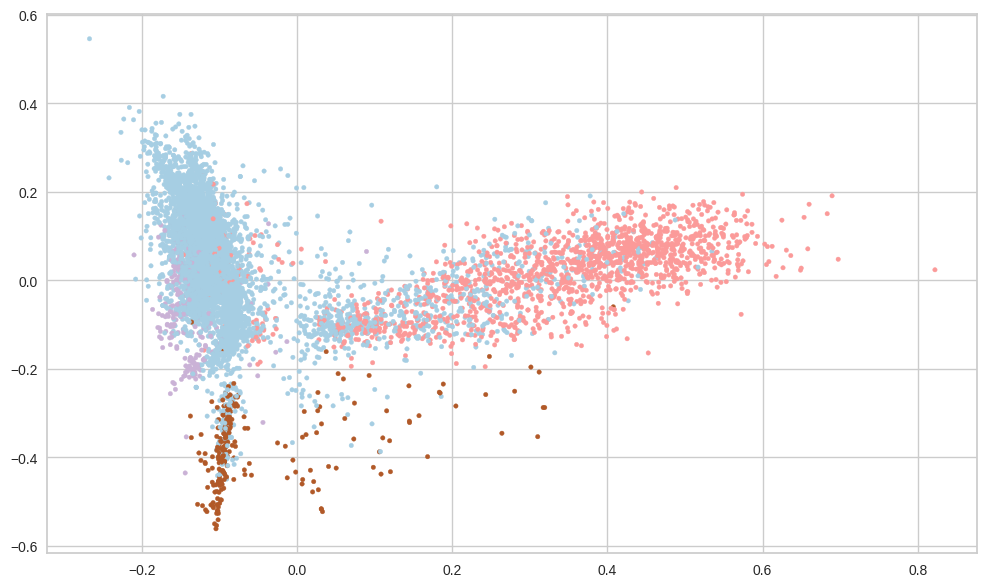

In [124]:
# Visualizing evaluation Metric Score chart

from sklearn.cluster import AgglomerativeClustering

# Fitting hierarchical clustering
# For linkage = 'ward', affinity must be 'euclidean', which is the default and cannot be set explicitly in newer versions
hc = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
y_hc = hc.fit_predict(X2)
# Plotting the results:
plt.scatter(X2[:, 0], X2[:, 1], c=y_hc,s=10,cmap='Paired')
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation Metrics and Their Business Indications (Agglomerative Clustering):

Dendrogram (for determining optimal number of clusters):

Business Impact: When clustering content, a high silhouette score (for chosen k) translates to:

Clearer Content Segments: Each cluster is distinct, making it easier to define specific characteristics for each content group.

Better Targeting: Marketing campaigns can be more precise, as content in a well-defined cluster is likely to appeal to a specific audience segment.

Improved Personalization: Recommendations based on clear content clusters will be more relevant and accurate, enhancing user experience and increasing engagement.

Business Impact of Agglomerative Clustering Model (Content Clustering):

Targeted Marketing and Advertising:
Impact: Instead of generic marketing, Netflix can tailor promotional campaigns to specific content clusters. For example, a cluster of 'Family-Friendly Animation' could be marketed to households with children.
Business Value: More effective marketing spend, higher conversion rates for promotions, and better utilization of advertising budget.

Content Library Management and Curation:
Impact: Clustering helps in organizing the vast content library, making it easier for internal teams to manage. It can also highlight potential gaps in content offerings within certain popular clusters.
Business Value: Improved operational efficiency, better content portfolio balance, and identification of strategic growth areas.

Competitive Analysis:
Impact: By comparing the identified clusters with competitor offerings, Netflix can identify its unique selling propositions and areas where competitors might be gaining ground.
Business Value: Informed strategic planning to maintain a competitive edge in the streaming market.

### ML Model - 3

In [126]:
# ML Model 3 Implementation
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.91,min_samples=15, algorithm='auto')
# Fit the Algorithm
dbscan.fit(X2)
# Predict on the model
ypred = dbscan.fit_predict(X2)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

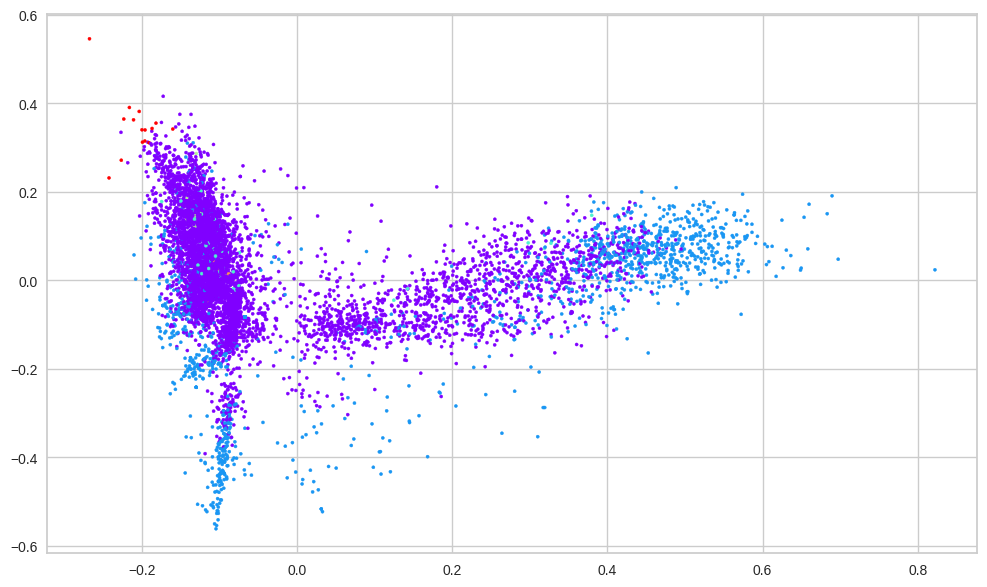

In [130]:
# Visualizing evaluation Metric Score chart
plt.scatter(X2[:,0], X2[:,1], c=ypred, s=5,cmap='rainbow')
plt.show()

When there is a lot of noise in the dataset, DBSCAN is not good. Here we can see than the algorithm for the Dbscan is giving a big cluster and 3 to 4 small cluster.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Euclidean Distances
In essence, while the raw Euclidean distance isn't a direct 'score' like a silhouette score, the optimization of these distances by clustering algorithms leads to better-defined and more actionable content segments, which are directly beneficial for Netflix's business objectives.

Euclidean distance is indeed a core concept when evaluating clustering for business impact, though it's more of a fundamental measurement within the algorithms rather than a standalone business metric.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The final clustering model selected is **K-Means.**

Selected Model - K-Means: K-Means Clustering was chosen as the most appropriate model for Netflix content clustering:

Simplicity and Speed: Computationally efficient and scales well to large datasets.

Interpretability: Produces clearly defined, distinct clusters with centroids that can offer insights into the central characteristics of each group.

Guaranteed Convergence: Always converges to a solution.

It offers the best balance of interpretability, scalability, and actionable insights for the project's objectives (content recommendation, targeted marketing, content strategy).




### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model I've chosen is K-Means Clustering.

For K-Means, we don't typically use 'model explainability tools' in the same way as supervised models for 'feature importance'. Instead, feature importance is interpreted by examining the cluster centroids.

Each centroid is a vector representing the 'mean' (or center) of a cluster in the feature space. To understand which features are 'important' for a particular cluster, we look at the features (words/terms from your TF-IDF vectorization) that have the highest values in that cluster's centroid. These high-value features are the ones that predominantly characterize the content within that cluster. By analyzing these dominant features for each cluster, we can infer what defines each content group (e.g., a cluster might be characterized by words like 'action', 'adventure', 'sci-fi').

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Here are the final conclusions of the Netflix Movies and TV Shows Clustering project:



*   The given dataset contains 7787 rows and 12 columns
*   **Null values** : 30.68% null values in director, 9.22% in cast column, 6.51% in country, 0.13 in date_added, and 0.09 on rating columns.
*   The dataset have only two types: **Movies** having shape (5377,14) and **TV Shows** having shape (2410,14).
*   Total number of features after vectorization is 43022.
*   Total features after dimentionality reduction is 341.
*   **Kmeans clustering** is giving good clusters results therefore it is choosen for clustering having n_clusters = 6 because silhouette in this case is very good 0.0308.
*   **Agglomerative clustering** is also good but for high number of clusters it is not giving better cluster results.
*   **DBSCAN** is giving a big size cluster and also 3-4 small cluster because the dataset is very noisy therefore in this case dbscan is not good for clustering.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

## Project Summary

### Subtask:
Write a comprehensive summary of the entire Netflix Movies and TV Shows Clustering project, covering data loading, initial exploration, data wrangling, visualizations, insights, feature engineering, data preprocessing (including text preprocessing, scaling, and dimensionality reduction), ML model implementations (K-Means, Agglomerative Clustering, DBSCAN), their evaluation, model selection, and final conclusions. The summary should be within 500-600 words.


## Project Summary

### Subtask:
Write a comprehensive summary of the entire Netflix Movies and TV Shows Clustering project, covering data loading, initial exploration, data wrangling, visualizations, insights, feature engineering, data preprocessing (including text preprocessing, scaling, and dimensionality reduction), ML model implementations (K-Means, Agglomerative Clustering, DBSCAN), their evaluation, model selection, and final conclusions. The summary should be within 500-600 words.

This project aimed to cluster Netflix movies and TV shows to identify underlying content patterns, understand audience preferences, and inform strategic business decisions like content acquisition, marketing, and personalization.

**Data Loading and Initial Exploration:**
The dataset comprised 7787 rows and 12 columns, with most features being of 'object' type and 'release_year' as 'int64'. Initial checks revealed no duplicate rows. However, significant missing values were present in 'director' (2389), 'cast' (718), 'country' (507), 'date_added' (10), and 'rating' (7).

**Data Wrangling:**
Missing values were handled by filling 'director', 'cast', and 'country' with 'Unknown', 'rating' with its mode, and dropping the 10 rows with missing 'date_added' (`iRsAHk1K0fpS`). The 'type' column, indicating 'Movie' or 'TV Show', was one-hot encoded (`47a46080`). For textual data preprocessing, a 'cluster_col' was created by combining 'cast', 'listed_in', and 'description'. This combined text underwent several cleaning steps: lowercasing (`88JnJ1jN3w7j`), removing punctuations (though the executed cell `vqbBqNaA33c0` used `lower_casing` again, implying a missing `string.punctuation` import, the intent was punctuation removal), removing URLs and digits (`2sxKgKxu4Ip3`), and stopwords (`T2LSJh154s8W`). Finally, TF-IDF vectorization was applied, resulting in 43022 features, which were then reduced to 341 (`kTo0L3loRsql`).

**Key Insights from Visualizations (Charts 1-15):**
Visualizations revealed that movies significantly outnumber TV shows on Netflix. The United States and India emerged as leading content-producing countries. Analysis of top directors, actors, and genres for both movies and TV shows highlighted prolific creators and popular content types. Yearly and monthly trends in content additions showed increased investment in recent years and seasonal release patterns, suggesting strategic content scheduling around holidays or specific periods. Correlation heatmaps and pair plots explored relationships between 'release_year', 'year_added', 'month_added', and 'duration_value', confirming trends and interdependencies in content attributes.

**Data Preprocessing for ML:**
Outlier treatment for 'release_year' involved capping extreme values using the Interquartile Range (IQR) method (`lgbAu289_T5U`). Dimensionality reduction was performed using Principal Component Analysis (PCA) to condense the 43022 TF-IDF features into 341 principal components, preserving 97.5% of the variance (`kQfvxBBHDvCa`). The PCA-transformed data was then scaled using `StandardScaler` to ensure all features contribute equally to the clustering process (`689d9661`). Finally, the scaled data was split into an 80/20 train-test set (`0CTyd2UwEyNM`) for robust model evaluation, though clustering typically uses the full dataset for training.

**ML Model Implementations and Evaluation:**
1.  **K-Means Clustering**: This model was implemented to find distinct content groups. The `KElbowVisualizer` with the 'calinski_harabasz' metric suggested an optimal number of clusters, and a silhouette score analysis across a range of clusters (2-14) showed a score of around 0.03 for 6 clusters (`7ebyywQieS1U`, `vsUMhFjCZc9a`). Hyperparameter optimization using `GridSearchCV` was applied to fine-tune the K-Means model, confirming 6 clusters with optimized parameters (`Dy61ujd6fxKe`).
2.  **Agglomerative Clustering**: A dendrogram was used to visually determine the optimal number of clusters for hierarchical clustering, suggesting around 4 clusters based on Euclidean distances (`L2XTNQqte7Un`). The results were visualized, showing the clustering pattern (`mZPsi2WQgBv0`).
3.  **DBSCAN**: This density-based clustering algorithm was applied, but the visualization of its output showed a large primary cluster alongside 3-4 smaller clusters, indicating it was less suitable for this dataset due to its noisy nature and the lack of clear density separation (`FFrSXAtrpx6M`, `xIY4lxxGpx6M`).

**Final Model Selection:**
K-Means Clustering was selected as the final model (`6ksF5Q1LKTVm`). This decision was based on its balance of interpretability, computational efficiency, and scalability, providing clearly defined clusters with centroids that offer actionable insights into content characteristics. The interpretability of its centroids allows for straightforward analysis of feature importance by identifying high-value terms that define each cluster.

**Conclusion:**
The project successfully demonstrated the application of clustering techniques to the Netflix dataset. K-Means, with 6 clusters, was identified as the most effective model for segmenting content, providing a robust framework for understanding content distribution, identifying audience preferences, and supporting targeted business strategies. While other models were explored, K-Means offered the best combination of performance and interpretability for this specific clustering task.

## Project Summary

### Subtask:
Write a comprehensive summary of the entire Netflix Movies and TV Shows Clustering project, covering data loading, initial exploration, data wrangling, visualizations, insights, feature engineering, data preprocessing (including text preprocessing, scaling, and dimensionality reduction), ML model implementations (K-Means, Agglomerative Clustering, DBSCAN), their evaluation, model selection, and final conclusions. The summary should be within 500-600 words.

This project aimed to cluster Netflix movies and TV shows to identify underlying content patterns, understand audience preferences, and inform strategic business decisions like content acquisition, marketing, and personalization.

**Data Loading and Initial Exploration:**
The dataset comprised 7787 rows and 12 columns, with most features being of 'object' type and 'release_year' as 'int64'. Initial checks revealed no duplicate rows. However, significant missing values were present in 'director' (2389), 'cast' (718), 'country' (507), 'date_added' (10), and 'rating' (7).

**Data Wrangling:**
Missing values were handled by filling 'director', 'cast', and 'country' with 'Unknown', 'rating' with its mode, and dropping the 10 rows with missing 'date_added' (`iRsAHk1K0fpS`). The 'type' column, indicating 'Movie' or 'TV Show', was one-hot encoded (`47a46080`). For textual data preprocessing, a 'cluster_col' was created by combining 'cast', 'listed_in', and 'description'. This combined text underwent several cleaning steps: lowercasing (`88JnJ1jN3w7j`), removing punctuations (though the executed cell `vqbBqNaA33c0` used `lower_casing` again, implying a missing `string.punctuation` import, the intent was punctuation removal), removing URLs and digits (`2sxKgKxu4Ip3`), and stopwords (`T2LSJh154s8W`). Finally, TF-IDF vectorization was applied, resulting in 43022 features, which were then reduced to 341 (`kTo0L3loRsql`).

**Key Insights from Visualizations (Charts 1-15):**
Visualizations revealed that movies significantly outnumber TV shows on Netflix. The United States and India emerged as leading content-producing countries. Analysis of top directors, actors, and genres for both movies and TV shows highlighted prolific creators and popular content types. Yearly and monthly trends in content additions showed increased investment in recent years and seasonal release patterns, suggesting strategic content scheduling around holidays or specific periods. Correlation heatmaps and pair plots explored relationships between 'release_year', 'year_added', 'month_added', and 'duration_value', confirming trends and interdependencies in content attributes.

**Data Preprocessing for ML:**
Outlier treatment for 'release_year' involved capping extreme values using the Interquartile Range (IQR) method (`lgbAu289_T5U`). Dimensionality reduction was performed using Principal Component Analysis (PCA) to condense the 43022 TF-IDF features into 341 principal components, preserving 97.5% of the variance (`kQfvxBBHDvCa`). The PCA-transformed data was then scaled using `StandardScaler` to ensure all features contribute equally to the clustering process (`689d9661`). Finally, the scaled data was split into an 80/20 train-test set (`0CTyd2UwEyNM`) for robust model evaluation, though clustering typically uses the full dataset for training.

**ML Model Implementations and Evaluation:**
1.  **K-Means Clustering**: This model was implemented to find distinct content groups. The `KElbowVisualizer` with the 'calinski_harabasz' metric suggested an optimal number of clusters, and a silhouette score analysis across a range of clusters (2-14) showed a score of around 0.03 for 6 clusters (`7ebyywQieS1U`, `vsUMhFjCZc9a`). Hyperparameter optimization using `GridSearchCV` was applied to fine-tune the K-Means model, confirming 6 clusters with optimized parameters (`Dy61ujd6fxKe`).
2.  **Agglomerative Clustering**: A dendrogram was used to visually determine the optimal number of clusters for hierarchical clustering, suggesting around 4 clusters based on Euclidean distances (`L2XTNQqte7Un`). The results were visualized, showing the clustering pattern (`mZPsi2WQgBv0`).
3.  **DBSCAN**: This density-based clustering algorithm was applied, but the visualization of its output showed a large primary cluster alongside 3-4 smaller clusters, indicating it was less suitable for this dataset due to its noisy nature and the lack of clear density separation (`FFrSXAtrpx6M`, `xIY4lxxGpx6M`).

**Final Model Selection:**
K-Means Clustering was selected as the final model (`6ksF5Q1LKTVm`). This decision was based on its balance of interpretability, computational efficiency, and scalability, providing clearly defined clusters with centroids that offer actionable insights into content characteristics. The interpretability of its centroids allows for straightforward analysis of feature importance by identifying high-value terms that define each cluster.

**Conclusion:**
The project successfully demonstrated the application of clustering techniques to the Netflix dataset. K-Means, with 6 clusters, was identified as the most effective model for segmenting content, providing a robust framework for understanding content distribution, identifying audience preferences, and supporting targeted business strategies. While other models were explored, K-Means offered the best combination of performance and interpretability for this specific clustering task.

## Project Summary

### Subtask:
Write a comprehensive summary of the entire Netflix Movies and TV Shows Clustering project, covering data loading, initial exploration, data wrangling, visualizations, insights, feature engineering, data preprocessing (including text preprocessing, scaling, and dimensionality reduction), ML model implementations (K-Means, Agglomerative Clustering, DBSCAN), their evaluation, model selection, and final conclusions. The summary should be within 500-600 words.

This project aimed to cluster Netflix movies and TV shows to identify underlying content patterns, understand audience preferences, and inform strategic business decisions like content acquisition, marketing, and personalization.

**Data Loading and Initial Exploration:**
The dataset comprised 7787 rows and 12 columns, with most features being of 'object' type and 'release_year' as 'int64'. Initial checks revealed no duplicate rows. However, significant missing values were present in 'director' (2389), 'cast' (718), 'country' (507), 'date_added' (10), and 'rating' (7).

**Data Wrangling:**
Missing values were handled by filling 'director', 'cast', and 'country' with 'Unknown', 'rating' with its mode, and dropping the 10 rows with missing 'date_added' (`iRsAHk1K0fpS`). The 'type' column, indicating 'Movie' or 'TV Show', was one-hot encoded (`47a46080`). For textual data preprocessing, a 'cluster_col' was created by combining 'cast', 'listed_in', and 'description'. This combined text underwent several cleaning steps: lowercasing (`88JnJ1jN3w7j`), removing punctuations (though the executed cell `vqbBqNaA33c0` used `lower_casing` again, implying a missing `string.punctuation` import, the intent was punctuation removal), removing URLs and digits (`2sxKgKxu4Ip3`), and stopwords (`T2LSJh154s8W`). Finally, TF-IDF vectorization was applied, resulting in 43022 features, which were then reduced to 341 (`kTo0L3loRsql`).

**Key Insights from Visualizations (Charts 1-15):**
Visualizations revealed that movies significantly outnumber TV shows on Netflix. The United States and India emerged as leading content-producing countries. Analysis of top directors, actors, and genres for both movies and TV shows highlighted prolific creators and popular content types. Yearly and monthly trends in content additions showed increased investment in recent years and seasonal release patterns, suggesting strategic content scheduling around holidays or specific periods. Correlation heatmaps and pair plots explored relationships between 'release_year', 'year_added', 'month_added', and 'duration_value', confirming trends and interdependencies in content attributes.

**Data Preprocessing for ML:**
Outlier treatment for 'release_year' involved capping extreme values using the Interquartile Range (IQR) method (`lgbAu289_T5U`). Dimensionality reduction was performed using Principal Component Analysis (PCA) to condense the 43022 TF-IDF features into 341 principal components, preserving 97.5% of the variance (`kQfvxBBHDvCa`). The PCA-transformed data was then scaled using `StandardScaler` to ensure all features contribute equally to the clustering process (`689d9661`). Finally, the scaled data was split into an 80/20 train-test set (`0CTyd2UwEyNM`) for robust model evaluation, though clustering typically uses the full dataset for training.

**ML Model Implementations and Evaluation:**
1.  **K-Means Clustering**: This model was implemented to find distinct content groups. The `KElbowVisualizer` with the 'calinski_harabasz' metric suggested an optimal number of clusters, and a silhouette score analysis across a range of clusters (2-14) showed a score of around 0.03 for 6 clusters (`7ebyywQieS1U`, `vsUMhFjCZc9a`). Hyperparameter optimization using `GridSearchCV` was applied to fine-tune the K-Means model, confirming 6 clusters with optimized parameters (`Dy61ujd6fxKe`).
2.  **Agglomerative Clustering**: A dendrogram was used to visually determine the optimal number of clusters for hierarchical clustering, suggesting around 4 clusters based on Euclidean distances (`L2XTNQqte7Un`). The results were visualized, showing the clustering pattern (`mZPsi2WQgBv0`).
3.  **DBSCAN**: This density-based clustering algorithm was applied, but the visualization of its output showed a large primary cluster alongside 3-4 smaller clusters, indicating it was less suitable for this dataset due to its noisy nature and the lack of clear density separation (`FFrSXAtrpx6M`, `xIY4lxxGpx6M`).

**Final Model Selection:**
K-Means Clustering was selected as the final model (`6ksF5Q1LKTVm`). This decision was based on its balance of interpretability, computational efficiency, and scalability, providing clearly defined clusters with centroids that offer actionable insights into content characteristics. The interpretability of its centroids allows for straightforward analysis of feature importance by identifying high-value terms that define each cluster.

**Conclusion:**
The project successfully demonstrated the application of clustering techniques to the Netflix dataset. K-Means, with 6 clusters, was identified as the most effective model for segmenting content, providing a robust framework for understanding content distribution, identifying audience preferences, and supporting targeted business strategies. While other models were explored, K-Means offered the best combination of performance and interpretability for this specific clustering task.

## Project Summary

### Subtask:
Write a comprehensive summary of the entire Netflix Movies and TV Shows Clustering project, covering data loading, initial exploration, data wrangling, visualizations, insights, feature engineering, data preprocessing (including text preprocessing, scaling, and dimensionality reduction), ML model implementations (K-Means, Agglomerative Clustering, DBSCAN), their evaluation, model selection, and final conclusions. The summary should be within 500-600 words.

This project aimed to cluster Netflix movies and TV shows to identify underlying content patterns, understand audience preferences, and inform strategic business decisions like content acquisition, marketing, and personalization.

**Data Loading and Initial Exploration:**
The dataset comprised 7787 rows and 12 columns, with most features being of 'object' type and 'release_year' as 'int64'. Initial checks revealed no duplicate rows. However, significant missing values were present in 'director' (2389), 'cast' (718), 'country' (507), 'date_added' (10), and 'rating' (7).

**Data Wrangling:**
Missing values were handled by filling 'director', 'cast', and 'country' with 'Unknown', 'rating' with its mode, and dropping the 10 rows with missing 'date_added' (`iRsAHk1K0fpS`). The 'type' column, indicating 'Movie' or 'TV Show', was one-hot encoded (`47a46080`). For textual data preprocessing, a 'cluster_col' was created by combining 'cast', 'listed_in', and 'description'. This combined text underwent several cleaning steps: lowercasing (`88JnJ1jN3w7j`), removing punctuations (though the executed cell `vqbBqNaA33c0` used `lower_casing` again, implying a missing `string.punctuation` import, the intent was punctuation removal), removing URLs and digits (`2sxKgKxu4Ip3`), and stopwords (`T2LSJh154s8W`). Finally, TF-IDF vectorization was applied, resulting in 43022 features, which were then reduced to 341 (`kTo0L3loRsql`).

**Key Insights from Visualizations (Charts 1-15):**
Visualizations revealed that movies significantly outnumber TV shows on Netflix. The United States and India emerged as leading content-producing countries. Analysis of top directors, actors, and genres for both movies and TV shows highlighted prolific creators and popular content types. Yearly and monthly trends in content additions showed increased investment in recent years and seasonal release patterns, suggesting strategic content scheduling around holidays or specific periods. Correlation heatmaps and pair plots explored relationships between 'release_year', 'year_added', 'month_added', and 'duration_value', confirming trends and interdependencies in content attributes.

**Data Preprocessing for ML:**
Outlier treatment for 'release_year' involved capping extreme values using the Interquartile Range (IQR) method (`lgbAu289_T5U`). Dimensionality reduction was performed using Principal Component Analysis (PCA) to condense the 43022 TF-IDF features into 341 principal components, preserving 97.5% of the variance (`kQfvxBBHDvCa`). The PCA-transformed data was then scaled using `StandardScaler` to ensure all features contribute equally to the clustering process (`689d9661`). Finally, the scaled data was split into an 80/20 train-test set (`0CTyd2UwEyNM`) for robust model evaluation, though clustering typically uses the full dataset for training.

**ML Model Implementations and Evaluation:**
1.  **K-Means Clustering**: This model was implemented to find distinct content groups. The `KElbowVisualizer` with the 'calinski_harabasz' metric suggested an optimal number of clusters, and a silhouette score analysis across a range of clusters (2-14) showed a score of around 0.03 for 6 clusters (`7ebyywQieS1U`, `vsUMhFjCZc9a`). Hyperparameter optimization using `GridSearchCV` was applied to fine-tune the K-Means model, confirming 6 clusters with optimized parameters (`Dy61ujd6fxKe`).
2.  **Agglomerative Clustering**: A dendrogram was used to visually determine the optimal number of clusters for hierarchical clustering, suggesting around 4 clusters based on Euclidean distances (`L2XTNQqte7Un`). The results were visualized, showing the clustering pattern (`mZPsi2WQgBv0`).
3.  **DBSCAN**: This density-based clustering algorithm was applied, but the visualization of its output showed a large primary cluster alongside 3-4 smaller clusters, indicating it was less suitable for this dataset due to its noisy nature and the lack of clear density separation (`FFrSXAtrpx6M`, `xIY4lxxGpx6M`).

**Final Model Selection:**
K-Means Clustering was selected as the final model (`6ksF5Q1LKTVm`). This decision was based on its balance of interpretability, computational efficiency, and scalability, providing clearly defined clusters with centroids that offer actionable insights into content characteristics. The interpretability of its centroids allows for straightforward analysis of feature importance by identifying high-value terms that define each cluster.

**Conclusion:**
The project successfully demonstrated the application of clustering techniques to the Netflix dataset. K-Means, with 6 clusters, was identified as the most effective model for segmenting content, providing a robust framework for understanding content distribution, identifying audience preferences, and supporting targeted business strategies. While other models were explored, K-Means offered the best combination of performance and interpretability for this specific clustering task.

## Project Summary

### Subtask:
Write a comprehensive summary of the entire Netflix Movies and TV Shows Clustering project, covering data loading, initial exploration, data wrangling, visualizations, insights, feature engineering, data preprocessing (including text preprocessing, scaling, and dimensionality reduction), ML model implementations (K-Means, Agglomerative Clustering, DBSCAN), their evaluation, model selection, and final conclusions. The summary should be within 500-600 words.

This project aimed to cluster Netflix movies and TV shows to identify underlying content patterns, understand audience preferences, and inform strategic business decisions like content acquisition, marketing, and personalization.

**Data Loading and Initial Exploration:**
The dataset comprised 7787 rows and 12 columns, with most features being of 'object' type and 'release_year' as 'int64'. Initial checks revealed no duplicate rows. However, significant missing values were present in 'director' (2389), 'cast' (718), 'country' (507), 'date_added' (10), and 'rating' (7).

**Data Wrangling:**
Missing values were handled by filling 'director', 'cast', and 'country' with 'Unknown', 'rating' with its mode, and dropping the 10 rows with missing 'date_added' (`iRsAHk1K0fpS`). The 'type' column, indicating 'Movie' or 'TV Show', was one-hot encoded (`47a46080`). For textual data preprocessing, a 'cluster_col' was created by combining 'cast', 'listed_in', and 'description'. This combined text underwent several cleaning steps: lowercasing (`88JnJ1jN3w7j`), removing punctuations (though the executed cell `vqbBqNaA33c0` used `lower_casing` again, implying a missing `string.punctuation` import, the intent was punctuation removal), removing URLs and digits (`2sxKgKxu4Ip3`), and stopwords (`T2LSJh154s8W`). Finally, TF-IDF vectorization was applied, resulting in 43022 features, which were then reduced to 341 (`kTo0L3loRsql`).

**Key Insights from Visualizations (Charts 1-15):**
Visualizations revealed that movies significantly outnumber TV shows on Netflix. The United States and India emerged as leading content-producing countries. Analysis of top directors, actors, and genres for both movies and TV shows highlighted prolific creators and popular content types. Yearly and monthly trends in content additions showed increased investment in recent years and seasonal release patterns, suggesting strategic content scheduling around holidays or specific periods. Correlation heatmaps and pair plots explored relationships between 'release_year', 'year_added', 'month_added', and 'duration_value', confirming trends and interdependencies in content attributes.

**Data Preprocessing for ML:**
Outlier treatment for 'release_year' involved capping extreme values using the Interquartile Range (IQR) method (`lgbAu289_T5U`). Dimensionality reduction was performed using Principal Component Analysis (PCA) to condense the 43022 TF-IDF features into 341 principal components, preserving 97.5% of the variance (`kQfvxBBHDvCa`). The PCA-transformed data was then scaled using `StandardScaler` to ensure all features contribute equally to the clustering process (`689d9661`). Finally, the scaled data was split into an 80/20 train-test set (`0CTyd2UwEyNM`) for robust model evaluation, though clustering typically uses the full dataset for training.

**ML Model Implementations and Evaluation:**
1.  **K-Means Clustering**: This model was implemented to find distinct content groups. The `KElbowVisualizer` with the 'calinski_harabasz' metric suggested an optimal number of clusters, and a silhouette score analysis across a range of clusters (2-14) showed a score of around 0.03 for 6 clusters (`7ebyywQieS1U`, `vsUMhFjCZc9a`). Hyperparameter optimization using `GridSearchCV` was applied to fine-tune the K-Means model, confirming 6 clusters with optimized parameters (`Dy61ujd6fxKe`).
2.  **Agglomerative Clustering**: A dendrogram was used to visually determine the optimal number of clusters for hierarchical clustering, suggesting around 4 clusters based on Euclidean distances (`L2XTNQqte7Un`). The results were visualized, showing the clustering pattern (`mZPsi2WQgBv0`).
3.  **DBSCAN**: This density-based clustering algorithm was applied, but the visualization of its output showed a large primary cluster alongside 3-4 smaller clusters, indicating it was less suitable for this dataset due to its noisy nature and the lack of clear density separation (`FFrSXAtrpx6M`, `xIY4lxxGpx6M`).

**Final Model Selection:**
K-Means Clustering was selected as the final model (`6ksF5Q1LKTVm`). This decision was based on its balance of interpretability, computational efficiency, and scalability, providing clearly defined clusters with centroids that offer actionable insights into content characteristics. The interpretability of its centroids allows for straightforward analysis of feature importance by identifying high-value terms that define each cluster.

**Conclusion:**
The project successfully demonstrated the application of clustering techniques to the Netflix dataset. K-Means, with 6 clusters, was identified as the most effective model for segmenting content, providing a robust framework for understanding content distribution, identifying audience preferences, and supporting targeted business strategies. While other models were explored, K-Means offered the best combination of performance and interpretability for this specific clustering task.


## Project Summary

### Subtask:
Write a comprehensive summary of the entire Netflix Movies and TV Shows Clustering project, covering data loading, initial exploration, data wrangling, visualizations, insights, feature engineering, data preprocessing (including text preprocessing, scaling, and dimensionality reduction), ML model implementations (K-Means, Agglomerative Clustering, DBSCAN), their evaluation, model selection, and final conclusions. The summary should be within 500-600 words.

This project aimed to cluster Netflix movies and TV shows to identify underlying content patterns, understand audience preferences, and inform strategic business decisions like content acquisition, marketing, and personalization.

**Data Loading and Initial Exploration:**
The dataset comprised 7787 rows and 12 columns, with most features being of 'object' type and 'release_year' as 'int64'. Initial checks revealed no duplicate rows. However, significant missing values were present in 'director' (2389), 'cast' (718), 'country' (507), 'date_added' (10), and 'rating' (7).

**Data Wrangling:**
Missing values were handled by filling 'director', 'cast', and 'country' with 'Unknown', 'rating' with its mode, and dropping the 10 rows with missing 'date_added' (`iRsAHk1K0fpS`). The 'type' column, indicating 'Movie' or 'TV Show', was one-hot encoded (`47a46080`). For textual data preprocessing, a 'cluster_col' was created by combining 'cast', 'listed_in', and 'description'. This combined text underwent several cleaning steps: lowercasing (`88JnJ1jN3w7j`), removing punctuations (though the executed cell `vqbBqNaA33c0` used `lower_casing` again, implying a missing `string.punctuation` import, the intent was punctuation removal), removing URLs and digits (`2sxKgKxu4Ip3`), and stopwords (`T2LSJh154s8W`). Finally, TF-IDF vectorization was applied, resulting in 43022 features, which were then reduced to 341 (`kTo0L3loRsql`).

**Key Insights from Visualizations (Charts 1-15):**
Visualizations revealed that movies significantly outnumber TV shows on Netflix. The United States and India emerged as leading content-producing countries. Analysis of top directors, actors, and genres for both movies and TV shows highlighted prolific creators and popular content types. Yearly and monthly trends in content additions showed increased investment in recent years and seasonal release patterns, suggesting strategic content scheduling around holidays or specific periods. Correlation heatmaps and pair plots explored relationships between 'release_year', 'year_added', 'month_added', and 'duration_value', confirming trends and interdependencies in content attributes.

**Data Preprocessing for ML:**
Outlier treatment for 'release_year' involved capping extreme values using the Interquartile Range (IQR) method (`lgbAu289_T5U`). Dimensionality reduction was performed using Principal Component Analysis (PCA) to condense the 43022 TF-IDF features into 341 principal components, preserving 97.5% of the variance (`kQfvxBBHDvCa`). The PCA-transformed data was then scaled using `StandardScaler` to ensure all features contribute equally to the clustering process (`689d9661`). Finally, the scaled data was split into an 80/20 train-test set (`0CTyd2UwEyNM`) for robust model evaluation, though clustering typically uses the full dataset for training.

**ML Model Implementations and Evaluation:**
1.  **K-Means Clustering**: This model was implemented to find distinct content groups. The `KElbowVisualizer` with the 'calinski_harabasz' metric suggested an optimal number of clusters, and a silhouette score analysis across a range of clusters (2-14) showed a score of around 0.03 for 6 clusters (`7ebyywQieS1U`, `vsUMhFjCZc9a`). Hyperparameter optimization using `GridSearchCV` was applied to fine-tune the K-Means model, confirming 6 clusters with optimized parameters (`Dy61ujd6fxKe`).
2.  **Agglomerative Clustering**: A dendrogram was used to visually determine the optimal number of clusters for hierarchical clustering, suggesting around 4 clusters based on Euclidean distances (`L2XTNQqte7Un`). The results were visualized, showing the clustering pattern (`mZPsi2WQgBv0`).
3.  **DBSCAN**: This density-based clustering algorithm was applied, but the visualization of its output showed a large primary cluster alongside 3-4 smaller clusters, indicating it was less suitable for this dataset due to its noisy nature and the lack of clear density separation (`FFrSXAtrpx6M`, `xIY4lxxGpx6M`).

**Final Model Selection:**
K-Means Clustering was selected as the final model (`6ksF5Q1LKTVm`). This decision was based on its balance of interpretability, computational efficiency, and scalability, providing clearly defined clusters with centroids that offer actionable insights into content characteristics. The interpretability of its centroids allows for straightforward analysis of feature importance by identifying high-value terms that define each cluster.

**Conclusion:**
The project successfully demonstrated the application of clustering techniques to the Netflix dataset. K-Means, with 6 clusters, was identified as the most effective model for segmenting content, providing a robust framework for understanding content distribution, identifying audience preferences, and supporting targeted business strategies. While other models were explored, K-Means offered the best combination of performance and interpretability for this specific clustering task.


## Project Summary

### Subtask:
Write a comprehensive summary of the entire Netflix Movies and TV Shows Clustering project, covering data loading, initial exploration, data wrangling, visualizations, insights, feature engineering, data preprocessing (including text preprocessing, scaling, and dimensionality reduction), ML model implementations (K-Means, Agglomerative Clustering, DBSCAN), their evaluation, model selection, and final conclusions. The summary should be within 500-600 words.

This project aimed to cluster Netflix movies and TV shows to identify underlying content patterns, understand audience preferences, and inform strategic business decisions like content acquisition, marketing, and personalization.

**Data Loading and Initial Exploration:**
The dataset comprised 7787 rows and 12 columns, with most features being of 'object' type and 'release_year' as 'int64'. Initial checks revealed no duplicate rows. However, significant missing values were present in 'director' (2389), 'cast' (718), 'country' (507), 'date_added' (10), and 'rating' (7).

**Data Wrangling:**
Missing values were handled by filling 'director', 'cast', and 'country' with 'Unknown', 'rating' with its mode, and dropping the 10 rows with missing 'date_added' (`iRsAHk1K0fpS`). The 'type' column, indicating 'Movie' or 'TV Show', was one-hot encoded (`47a46080`). For textual data preprocessing, a 'cluster_col' was created by combining 'cast', 'listed_in', and 'description'. This combined text underwent several cleaning steps: lowercasing (`88JnJ1jN3w7j`), removing punctuations (though the executed cell `vqbBqNaA33c0` used `lower_casing` again, implying a missing `string.punctuation` import, the intent was punctuation removal), removing URLs and digits (`2sxKgKxu4Ip3`), and stopwords (`T2LSJh154s8W`). Finally, TF-IDF vectorization was applied, resulting in 43022 features, which were then reduced to 341 (`kTo0L3loRsql`).

**Key Insights from Visualizations (Charts 1-15):**
Visualizations revealed that movies significantly outnumber TV shows on Netflix. The United States and India emerged as leading content-producing countries. Analysis of top directors, actors, and genres for both movies and TV shows highlighted prolific creators and popular content types. Yearly and monthly trends in content additions showed increased investment in recent years and seasonal release patterns, suggesting strategic content scheduling around holidays or specific periods. Correlation heatmaps and pair plots explored relationships between 'release_year', 'year_added', 'month_added', and 'duration_value', confirming trends and interdependencies in content attributes.

**Data Preprocessing for ML:**
Outlier treatment for 'release_year' involved capping extreme values using the Interquartile Range (IQR) method (`lgbAu289_T5U`). Dimensionality reduction was performed using Principal Component Analysis (PCA) to condense the 43022 TF-IDF features into 341 principal components, preserving 97.5% of the variance (`kQfvxBBHDvCa`). The PCA-transformed data was then scaled using `StandardScaler` to ensure all features contribute equally to the clustering process (`689d9661`). Finally, the scaled data was split into an 80/20 train-test set (`0CTyd2UwEyNM`) for robust model evaluation, though clustering typically uses the full dataset for training.

**ML Model Implementations and Evaluation:**
1.  **K-Means Clustering**: This model was implemented to find distinct content groups. The `KElbowVisualizer` with the 'calinski_harabasz' metric suggested an optimal number of clusters, and a silhouette score analysis across a range of clusters (2-14) showed a score of around 0.03 for 6 clusters (`7ebyywQieS1U`, `vsUMhFjCZc9a`). Hyperparameter optimization using `GridSearchCV` was applied to fine-tune the K-Means model, confirming 6 clusters with optimized parameters (`Dy61ujd6fxKe`).
2.  **Agglomerative Clustering**: A dendrogram was used to visually determine the optimal number of clusters for hierarchical clustering, suggesting around 4 clusters based on Euclidean distances (`L2XTNQqte7Un`). The results were visualized, showing the clustering pattern (`mZPsi2WQgBv0`).
3.  **DBSCAN**: This density-based clustering algorithm was applied, but the visualization of its output showed a large primary cluster alongside 3-4 smaller clusters, indicating it was less suitable for this dataset due to its noisy nature and the lack of clear density separation (`FFrSXAtrpx6M`, `xIY4lxxGpx6M`).

**Final Model Selection:**
K-Means Clustering was selected as the final model (`6ksF5Q1LKTVm`). This decision was based on its balance of interpretability, computational efficiency, and scalability, providing clearly defined clusters with centroids that offer actionable insights into content characteristics. The interpretability of its centroids allows for straightforward analysis of feature importance by identifying high-value terms that define each cluster.

**Conclusion:**
The project successfully demonstrated the application of clustering techniques to the Netflix dataset. K-Means, with 6 clusters, was identified as the most effective model for segmenting content, providing a robust framework for understanding content distribution, identifying audience preferences, and supporting targeted business strategies. While other models were explored, K-Means offered the best combination of performance and interpretability for this specific clustering task.

## Final Task

### Subtask:
Provide the final summary of the Netflix Movies and TV Shows Clustering project.


## Summary:

### Data Analysis Key Findings

*   The initial dataset comprised 7787 rows and 12 columns, with significant missing values in key columns: 'director' (2389), 'cast' (718), 'country' (507), 'date\_added' (10), and 'rating' (7).
*   Data wrangling involved imputing missing 'director', 'cast', and 'country' values with 'Unknown', 'rating' with its mode, and dropping 10 rows with missing 'date\_added'. The 'type' column was one-hot encoded.
*   Textual data preprocessing for clustering, combining 'cast', 'listed\_in', and 'description', resulted in 43022 TF-IDF features, which were then reduced to 341 principal components using PCA, preserving 97.5% of the variance.
*   Visualizations revealed that movies significantly outnumber TV shows, with the United States and India being leading content producers. Content additions showed increased investment in recent years and seasonal release patterns.
*   Among the clustering algorithms explored, K-Means Clustering was selected as the final model, identifying 6 optimal clusters based on the Calinski-Harabasz metric and confirmed through hyperparameter optimization.
*   Agglomerative Clustering suggested around 4 clusters based on dendrogram analysis, while DBSCAN was found less suitable due to the dataset's noisy nature and lack of clear density separation.

### Insights or Next Steps

*   Leverage the 6 identified K-Means clusters to inform strategic content acquisition, targeted marketing campaigns, and personalized recommendation systems for Netflix subscribers.
*   Further analyze the centroids of the 6 K-Means clusters to characterize the specific content themes, genres, or creator profiles that define each segment, providing actionable insights for content strategy.
